In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

import json
import datetime
import requests

In [3]:
import requests
import json

In [198]:
api_key = 'KOk5FhlbcE5nmKuGSTGTxmf7i2liO683W4aedZbAkLjB6JSoJ031bvTsL8t4dfPoBnnPZ4-Bffn_xK8LTpFogSCob3LJg2WnzqIyMBPTyhtOu59efXCgKfa98Iq9X3Yx'
restaurant_categories = 'restaurants,bars,bakeries,bubbletea,desserts,delicatessen,cafes,icecream,donuts,juicebars,foodtrucks'

#Category List
#https://www.yelp.com/developers/documentation/v3/all_category_list
#'categories':'restaurants,bars,bakeries,bubbletea,desserts,delicatessen,cafes'

def get_businesses(location, term, categories, api_key):
    headers = {'Authorization': 'Bearer %s' % api_key}
    url = 'https://api.yelp.com/v3/businesses/search'

    data = []
    for offset in range(0, 1000, 50):
        params = {
            'limit': 50, 
            'categories': categories.replace(' ', '+'),
            'location': location.replace(' ', '+'),
            'term': term.replace(' ', '+'),
            'offset': offset
        }

        response = requests.get(url, headers=headers, params=params)
        if response.status_code == 200:
            data += response.json()['businesses']
        elif response.status_code == 400:
            print('400 Bad Request')
            break
    return data

In [56]:
Zip_Code_List = ['19102', '19103', '19104', '19106', '19107', '19109', '19111', '19112', 
                  '19114', '19115', '19116', '19118', '19119', '19120', '19121', '19122', 
                  '19123', '19124', '19125', '19126', '19127', '19128', '19129', '19130', 
                  '19131', '19132', '19133', '19134', '19135', '19136', '19137', '19138', 
                  '19139', '19140', '19141', '19142', '19143', '19144', '19145', '19146', 
                  '19147', '19148', '19149', '19150', '19151', '19152', '19153', '19154']

In [259]:
data = [get_businesses(x, '', restaurant_categories, api_key) for x in Zip_Code_List]

In [316]:
Full = [x for l in data for x in l]

In [317]:
len(Full)

22579

In [318]:
Restaurants = pd.DataFrame.from_dict(Full)

In [319]:
Restaurants.head()

id                                 alias  \
0  ytynqOUb3hjKeJfRj5Tshw  reading-terminal-market-philadelphia   
1  6ajnOk0GcY9xbb5Ocaw8Gw                 barbuzzo-philadelphia   
2  atZ_olNKXOG4rEr6mccN8g           beilers-bakery-philadelphia   
3  8pqdJjefYq-a9IBSJJmKwA            the-dandelion-philadelphia   
4  9PZxjhTIU7OgPIzuGi89Ew                   el-vez-philadelphia   

                      name                                          image_url  \
0  Reading Terminal Market  https://s3-media4.fl.yelpcdn.com/bphoto/Q2gU9l...   
1                 Barbuzzo  https://s3-media2.fl.yelpcdn.com/bphoto/88mJSI...   
2          Beiler's Bakery  https://s3-media1.fl.yelpcdn.com/bphoto/iDLoMa...   
3            The Dandelion  https://s3-media1.fl.yelpcdn.com/bphoto/IszoOQ...   
4                   El Vez  https://s3-media2.fl.yelpcdn.com/bphoto/iCMOOo...   

   is_closed                                                url  review_count  \
0      False  https://www.yelp.com/biz/reading-terminal-mark...          5433   
1      False  https://www.yelp.com/biz/barbuzzo-philadelphia...          2732   
2      False  https://www.yelp.com/biz/beilers-bakery-philad...          1297   
3      False  https://www.yelp.com/biz/the-dandelion-philade...          2354   
4      False  https://www.yelp.com/biz/el-vez-philadelphia?a...          3047   

                                          categories  rating  \
0  [{'alias': 'food_court', 'title': 'Food Court'...     4.5   
1  [{'alias': 'mediterranean', 'title': 'Mediterr...     4.5   
2  [{'alias': 'bakeries', 'title': 'Bakeries'}, {...     4.5   
3  [{'alias': 'gastropubs', 'title': 'Gastropubs'...     4.0   
4  [{'alias': 'mexican', 'title': 'Mexican'}, {'a...     4.0   

                                         coordinates        transactions  \
0  {'latitude': 39.953341464505, 'longitude': -75...                  []   
1     {'latitude': 39.94999, 'longitude': -75.16216}  [delivery, pickup]   
2   {'latitude': 39.953764, 'longitude': -75.159218}  [pickup, delivery]   
3   {'latitude': 39.951004, 'longitude': -75.170636}  [delivery, pickup]   
4  {'latitude': 39.9497020026001, 'longitude': -7...  [delivery, pickup]   

  price                                           location         phone  \
0    $$  {'address1': '51 N 12th St', 'address2': '', '...  +12159222317   
1    $$  {'address1': '110 S 13th St', 'address2': '', ...  +12155469300   
2     $  {'address1': '51 N 12th St', 'address2': '', '...  +12673187480   
3    $$  {'address1': '124 S 18th St', 'address2': '', ...  +12155582500   
4    $$  {'address1': '121 S 13th St', 'address2': '', ...  +12159289800   

    display_phone    distance  
0  (215) 922-2317  561.514136  
1  (215) 546-9300  396.010185  
2  (267) 318-7480  540.370929  
3  (215) 558-2500  482.178338  
4  (215) 928-9800  443.345121

In [320]:
Restaurants['latitude'] = [Restaurants['coordinates'][i]['latitude'] for i in range(len(Restaurants))]
Restaurants['longitude'] = [Restaurants['coordinates'][i]['longitude'] for i in range(len(Restaurants))]
Restaurants['address1'] = [Restaurants['location'][i]['address1'] for i in range(len(Restaurants))]
Restaurants['address2'] = [Restaurants['location'][i]['address2'] for i in range(len(Restaurants))]
Restaurants['address3'] = [Restaurants['location'][i]['address3'] for i in range(len(Restaurants))]
Restaurants['zip_code'] = [Restaurants['location'][i]['zip_code'] for i in range(len(Restaurants))]
Restaurants['city'] = [Restaurants['location'][i]['city'] for i in range(len(Restaurants))]
Restaurants['display_address'] = [Restaurants['location'][i]['display_address'] for i in range(len(Restaurants))]

In [321]:
Restaurants.head()

id                                 alias  \
0  ytynqOUb3hjKeJfRj5Tshw  reading-terminal-market-philadelphia   
1  6ajnOk0GcY9xbb5Ocaw8Gw                 barbuzzo-philadelphia   
2  atZ_olNKXOG4rEr6mccN8g           beilers-bakery-philadelphia   
3  8pqdJjefYq-a9IBSJJmKwA            the-dandelion-philadelphia   
4  9PZxjhTIU7OgPIzuGi89Ew                   el-vez-philadelphia   

                      name                                          image_url  \
0  Reading Terminal Market  https://s3-media4.fl.yelpcdn.com/bphoto/Q2gU9l...   
1                 Barbuzzo  https://s3-media2.fl.yelpcdn.com/bphoto/88mJSI...   
2          Beiler's Bakery  https://s3-media1.fl.yelpcdn.com/bphoto/iDLoMa...   
3            The Dandelion  https://s3-media1.fl.yelpcdn.com/bphoto/IszoOQ...   
4                   El Vez  https://s3-media2.fl.yelpcdn.com/bphoto/iCMOOo...   

   is_closed                                                url  review_count  \
0      False  https://www.yelp.com/biz/reading-terminal-mark...          5433   
1      False  https://www.yelp.com/biz/barbuzzo-philadelphia...          2732   
2      False  https://www.yelp.com/biz/beilers-bakery-philad...          1297   
3      False  https://www.yelp.com/biz/the-dandelion-philade...          2354   
4      False  https://www.yelp.com/biz/el-vez-philadelphia?a...          3047   

                                          categories  rating  \
0  [{'alias': 'food_court', 'title': 'Food Court'...     4.5   
1  [{'alias': 'mediterranean', 'title': 'Mediterr...     4.5   
2  [{'alias': 'bakeries', 'title': 'Bakeries'}, {...     4.5   
3  [{'alias': 'gastropubs', 'title': 'Gastropubs'...     4.0   
4  [{'alias': 'mexican', 'title': 'Mexican'}, {'a...     4.0   

                                         coordinates  ...   display_phone  \
0  {'latitude': 39.953341464505, 'longitude': -75...  ...  (215) 922-2317   
1     {'latitude': 39.94999, 'longitude': -75.16216}  ...  (215) 546-9300   
2   {'latitude': 39.953764, 'longitude': -75.159218}  ...  (267) 318-7480   
3   {'latitude': 39.951004, 'longitude': -75.170636}  ...  (215) 558-2500   
4  {'latitude': 39.9497020026001, 'longitude': -7...  ...  (215) 928-9800   

     distance   latitude  longitude       address1  address2  address3  \
0  561.514136  39.953341 -75.158855   51 N 12th St                       
1  396.010185  39.949990 -75.162160  110 S 13th St                       
2  540.370929  39.953764 -75.159218   51 N 12th St                       
3  482.178338  39.951004 -75.170636  124 S 18th St                       
4  443.345121  39.949702 -75.161770  121 S 13th St                       

   zip_code          city                          display_address  
0     19107  Philadelphia   [51 N 12th St, Philadelphia, PA 19107]  
1     19107  Philadelphia  [110 S 13th St, Philadelphia, PA 19107]  
2     19107  Philadelphia   [51 N 12th St, Philadelphia, PA 19107]  
3     19103  Philadelphia  [124 S 18th St, Philadelphia, PA 19103]  
4     19107  Philadelphia  [121 S 13th St, Philadelphia, PA 19107]  

[5 rows x 24 columns]

In [322]:
categories = Restaurants['categories'].explode().reset_index(name='Types')

In [323]:
categories['Types'] = [categories['Types'][i]['title'] for i in range(len(categories))]

In [324]:
categories.head()

index           Types
0      0      Food Court
1      0  Public Markets
2      1   Mediterranean
3      1           Pizza
4      2        Bakeries

In [325]:
Category_One = categories.groupby('index').first()
Category_Two = categories.groupby('index').last()

In [326]:
Edited = pd.merge(Restaurants, Category_One, left_index=True, right_on='index')
Edited = pd.merge(Edited, Category_Two, left_index=True, right_on='index')

#Rename Columns 
Edited.rename(columns={'Types_x':'Category_1'}, inplace=True)
Edited.rename(columns={'Types_y':'Category_2'}, inplace=True)


In [327]:
Edited.head()

id                                 alias  \
index                                                                 
0      ytynqOUb3hjKeJfRj5Tshw  reading-terminal-market-philadelphia   
1      6ajnOk0GcY9xbb5Ocaw8Gw                 barbuzzo-philadelphia   
2      atZ_olNKXOG4rEr6mccN8g           beilers-bakery-philadelphia   
3      8pqdJjefYq-a9IBSJJmKwA            the-dandelion-philadelphia   
4      9PZxjhTIU7OgPIzuGi89Ew                   el-vez-philadelphia   

                          name  \
index                            
0      Reading Terminal Market   
1                     Barbuzzo   
2              Beiler's Bakery   
3                The Dandelion   
4                       El Vez   

                                               image_url  is_closed  \
index                                                                 
0      https://s3-media4.fl.yelpcdn.com/bphoto/Q2gU9l...      False   
1      https://s3-media2.fl.yelpcdn.com/bphoto/88mJSI...      False   
2      https://s3-media1.fl.yelpcdn.com/bphoto/iDLoMa...      False   
3      https://s3-media1.fl.yelpcdn.com/bphoto/IszoOQ...      False   
4      https://s3-media2.fl.yelpcdn.com/bphoto/iCMOOo...      False   

                                                     url  review_count  \
index                                                                    
0      https://www.yelp.com/biz/reading-terminal-mark...          5433   
1      https://www.yelp.com/biz/barbuzzo-philadelphia...          2732   
2      https://www.yelp.com/biz/beilers-bakery-philad...          1297   
3      https://www.yelp.com/biz/the-dandelion-philade...          2354   
4      https://www.yelp.com/biz/el-vez-philadelphia?a...          3047   

                                              categories  rating  \
index                                                              
0      [{'alias': 'food_court', 'title': 'Food Court'...     4.5   
1      [{'alias': 'mediterranean', 'title': 'Mediterr...     4.5   
2      [{'alias': 'bakeries', 'title': 'Bakeries'}, {...     4.5   
3      [{'alias': 'gastropubs', 'title': 'Gastropubs'...     4.0   
4      [{'alias': 'mexican', 'title': 'Mexican'}, {'a...     4.0   

                                             coordinates  ...   latitude  \
index                                                     ...              
0      {'latitude': 39.953341464505, 'longitude': -75...  ...  39.953341   
1         {'latitude': 39.94999, 'longitude': -75.16216}  ...  39.949990   
2       {'latitude': 39.953764, 'longitude': -75.159218}  ...  39.953764   
3       {'latitude': 39.951004, 'longitude': -75.170636}  ...  39.951004   
4      {'latitude': 39.9497020026001, 'longitude': -7...  ...  39.949702   

       longitude       address1 address2 address3  zip_code          city  \
index                                                                       
0     -75.158855   51 N 12th St                       19107  Philadelphia   
1     -75.162160  110 S 13th St                       19107  Philadelphia   
2     -75.159218   51 N 12th St                       19107  Philadelphia   
3     -75.170636  124 S 18th St                       19103  Philadelphia   
4     -75.161770  121 S 13th St                       19107  Philadelphia   

                               display_address     Category_1  \
index                                                           
0       [51 N 12th St, Philadelphia, PA 19107]     Food Court   
1      [110 S 13th St, Philadelphia, PA 19107]  Mediterranean   
2       [51 N 12th St, Philadelphia, PA 19107]       Bakeries   
3      [124 S 18th St, Philadelphia, PA 19103]     Gastropubs   
4      [121 S 13th St, Philadelphia, PA 19107]        Mexican   

               Category_2  
index                      
0          Public Markets  
1                   Pizza  
2                  Donuts  
3                 British  
4      Breakfast & Brunch  

[5 rows x 26 columns]

In [328]:
#Trim Unneeded Columns
Drop_Col = ['id', 'alias', 'image_url', 'is_closed', 'url', 'categories', 'coordinates', 'distance',
            'display_address', 'transactions', 'phone', 'display_phone', 'location']
Final = Edited.drop(Drop_Col, axis=1)

In [329]:
Final

name  review_count  rating price   latitude  \
index                                                                   
0      Reading Terminal Market          5433     4.5    $$  39.953341   
1                     Barbuzzo          2732     4.5    $$  39.949990   
2              Beiler's Bakery          1297     4.5     $  39.953764   
3                The Dandelion          2354     4.0    $$  39.951004   
4                       El Vez          3047     4.0    $$  39.949702   
...                        ...           ...     ...   ...        ...   
22574            Intersteak 95             1     5.0   NaN  39.921700   
22575           LB's Lunch Box             4     5.0   NaN  39.599027   
22576           Dogs Gone Wild             4     5.0   NaN  40.199963   
22577      Just Salad Catering             6     3.5   NaN  40.759770   
22578        Mustache Pretzels             4     3.5     $  33.447560   

        longitude             address1 address2 address3 zip_code  \
index                                                               
0      -75.158855         51 N 12th St                      19107   
1      -75.162160        110 S 13th St                      19107   
2      -75.159218         51 N 12th St                      19107   
3      -75.170636        124 S 18th St                      19103   
4      -75.161770        121 S 13th St                      19107   
...           ...                  ...      ...      ...      ...   
22574  -75.187041  24th & Passyunk Ave     None     None    19146   
22575  -74.551204        2115 River Rd     None             08215   
22576  -74.047600                 None     None     None    07753   
22577  -73.969670    663 Lexington Ave     Fl 3             10022   
22578 -112.134570                                   None    85005   

               city     Category_1              Category_2  
index                                                       
0      Philadelphia     Food Court          Public Markets  
1      Philadelphia  Mediterranean                   Pizza  
2      Philadelphia       Bakeries                  Donuts  
3      Philadelphia     Gastropubs                 British  
4      Philadelphia        Mexican      Breakfast & Brunch  
...             ...            ...                     ...  
22574  Philadelphia    Food Trucks            Cheesesteaks  
22575    Lower Bank    Food Trucks  American (Traditional)  
22576  Neptune City    Food Trucks                 Burgers  
22577      New York          Salad              Vegetarian  
22578       Phoenix    Food Trucks             Food Trucks  

[22579 rows x 13 columns]

In [330]:
Philadelphia = (Final['city'] == 'Philadelphia') 
Final = Final.loc[Philadelphia]

In [331]:
Final

name  review_count  rating price  \
index                                                                   
0                 Reading Terminal Market          5433     4.5    $$   
1                                Barbuzzo          2732     4.5    $$   
2                         Beiler's Bakery          1297     4.5     $   
3                           The Dandelion          2354     4.0    $$   
4                                  El Vez          3047     4.0    $$   
...                                   ...           ...     ...   ...   
22565                   Slices Pizza Cafe             1     2.0    $$   
22567  The Lighthouse Jamaican Restaurant             3     1.0   NaN   
22569                   Red Line Catering             3     3.5   NaN   
22573                  Liberty Halal Gyro             1     3.0   NaN   
22574                       Intersteak 95             1     5.0   NaN   

        latitude  longitude             address1 address2 address3 zip_code  \
index                                                                         
0      39.953341 -75.158855         51 N 12th St                      19107   
1      39.949990 -75.162160        110 S 13th St                      19107   
2      39.953764 -75.159218         51 N 12th St                      19107   
3      39.951004 -75.170636        124 S 18th St                      19103   
4      39.949702 -75.161770        121 S 13th St                      19107   
...          ...        ...                  ...      ...      ...      ...   
22565  40.084061 -75.035500       1900 Grant Ave                      19115   
22567  40.057012 -75.013554      3217 Willits Rd              None    19114   
22569  40.030620 -75.214740                 None     None             19128   
22573  39.961100 -75.234405          60th Market     None             19139   
22574  39.921700 -75.187041  24th & Passyunk Ave     None     None    19146   

               city     Category_1          Category_2  
index                                                   
0      Philadelphia     Food Court      Public Markets  
1      Philadelphia  Mediterranean               Pizza  
2      Philadelphia       Bakeries              Donuts  
3      Philadelphia     Gastropubs             British  
4      Philadelphia        Mexican  Breakfast & Brunch  
...             ...            ...                 ...  
22565  Philadelphia          Pizza               Pizza  
22567  Philadelphia      Caribbean           Caribbean  
22569  Philadelphia       Caterers         Food Trucks  
22573  Philadelphia    Food Trucks         Food Trucks  
22574  Philadelphia    Food Trucks        Cheesesteaks  

[21003 rows x 13 columns]

In [332]:
Final.to_csv("Final.csv")

In [122]:
Final = pd.read_csv('/Users/Rashon/Final.csv')

In [123]:
Final

index                                name  review_count  rating price  \
0          0             Reading Terminal Market          5433     4.5    $$   
1          1                            Barbuzzo          2732     4.5    $$   
2          2                     Beiler's Bakery          1297     4.5     $   
3          3                       The Dandelion          2354     4.0    $$   
4          4                              El Vez          3047     4.0    $$   
...      ...                                 ...           ...     ...   ...   
20998  22565                   Slices Pizza Cafe             1     2.0    $$   
20999  22567  The Lighthouse Jamaican Restaurant             3     1.0   NaN   
21000  22569                   Red Line Catering             3     3.5   NaN   
21001  22573                  Liberty Halal Gyro             1     3.0   NaN   
21002  22574                       Intersteak 95             1     5.0   NaN   

        latitude  longitude             address1 address2 address3  zip_code  \
0      39.953341 -75.158855         51 N 12th St      NaN      NaN   19107.0   
1      39.949990 -75.162160        110 S 13th St      NaN      NaN   19107.0   
2      39.953764 -75.159218         51 N 12th St      NaN      NaN   19107.0   
3      39.951004 -75.170636        124 S 18th St      NaN      NaN   19103.0   
4      39.949702 -75.161770        121 S 13th St      NaN      NaN   19107.0   
...          ...        ...                  ...      ...      ...       ...   
20998  40.084061 -75.035500       1900 Grant Ave      NaN      NaN   19115.0   
20999  40.057012 -75.013554      3217 Willits Rd      NaN      NaN   19114.0   
21000  40.030620 -75.214740                  NaN      NaN      NaN   19128.0   
21001  39.961100 -75.234405          60th Market      NaN      NaN   19139.0   
21002  39.921700 -75.187041  24th & Passyunk Ave      NaN      NaN   19146.0   

               city     Category_1          Category_2  
0      Philadelphia     Food Court      Public Markets  
1      Philadelphia  Mediterranean               Pizza  
2      Philadelphia       Bakeries              Donuts  
3      Philadelphia     Gastropubs             British  
4      Philadelphia        Mexican  Breakfast & Brunch  
...             ...            ...                 ...  
20998  Philadelphia          Pizza               Pizza  
20999  Philadelphia      Caribbean           Caribbean  
21000  Philadelphia       Caterers         Food Trucks  
21001  Philadelphia    Food Trucks         Food Trucks  
21002  Philadelphia    Food Trucks        Cheesesteaks  

[21003 rows x 14 columns]

In [124]:
Name_List = []

Name_List = [Final['name'][x] for x in range(len(Final['name']))]

In [125]:
len(Name_List)

21003

In [126]:
Name_List_DF = pd.DataFrame({'col':Name_List})

In [127]:
chunks = [Name_List[x:x+1000] for x in range(0, len(Name_List), 1000)]


In [128]:
len(chunks)

22

In [272]:
len(chunks[21])

3

In [21]:
from bs4 import BeautifulSoup

In [131]:
def get_url(name):
    url = "http://data.inquirer.com/inspections/philly/?searchType=restaurant&rname={}".format(name)
    soup = BeautifulSoup(requests.get(url).content, 'html.parser')
    rows = soup.select(".inspectionUnit") 
    search_name = name
    
    return rows

In [262]:
outputs = [get_url(x) for x in chunks[21]]

In [263]:
# Keep track of the restaurant names and violations
names = []
urls = []
addresses = []

# Loop over each row
for output in outputs:
    
    # The name of the restaurant
    name = [output[x].find('div', attrs={'class': 'inspectionUnitName'}).text.strip() for x in range(len(output))]
    
    # Url
    url = [output[x].find('a')['href'] for x in range(len(output))]
    
    # Addresses
    address = [output[x].find('div', attrs={'class': 'inspectionUnitAddress'}).text.strip() for x in range(len(output))]
    
    names.append(name)
    urls.append(url)
    addresses.append(address)
    
Url_df = pd.DataFrame({"name" : names, "urls" :  urls, "address" : addresses})
Url_df.head()

name  \
0                                                 []   
1  [Uddin, Iqbal/Liberty Halal Gyro/#05022, Uddin...   
2                                                 []   

                                                urls  \
0                                                 []   
1  [http://data.inquirer.com/inspections/philly/?...   
2                                                 []   

                                             address  
0                                                 []  
1  [NON PERMANENT LOCATION 19121, NON PERMANENT L...  
2                                                 []

In [264]:
Unpacked_Urls = Url_df.apply(lambda x: x.explode())

In [265]:
Unpacked_Urls

name  \
0                                     NaN   
1  Uddin, Iqbal/Liberty Halal Gyro/#05022   
1  Uddin, Iqban/Liberty Halal Gyro/#05022   
2                                     NaN   

                                                urls  \
0                                                NaN   
1  http://data.inquirer.com/inspections/philly/?d...   
1  http://data.inquirer.com/inspections/philly/?d...   
2                                                NaN   

                        address  
0                           NaN  
1  NON PERMANENT LOCATION 19121  
1  NON PERMANENT LOCATION 19121  
2                           NaN

In [266]:
Chunk_21_DF = pd.DataFrame({'Search_Name':chunks[21]})

In [267]:
Chunk_21_DF

Search_Name
0   Red Line Catering
1  Liberty Halal Gyro
2       Intersteak 95

In [268]:
New_Unpacked_21 = pd.merge(Unpacked_Urls, Chunk_21_DF, left_index=True, right_index=True)

In [269]:
New_Unpacked_21.head()

name  \
0                                     NaN   
1  Uddin, Iqbal/Liberty Halal Gyro/#05022   
1  Uddin, Iqban/Liberty Halal Gyro/#05022   
2                                     NaN   

                                                urls  \
0                                                NaN   
1  http://data.inquirer.com/inspections/philly/?d...   
1  http://data.inquirer.com/inspections/philly/?d...   
2                                                NaN   

                        address         Search_Name  
0                           NaN   Red Line Catering  
1  NON PERMANENT LOCATION 19121  Liberty Halal Gyro  
1  NON PERMANENT LOCATION 19121  Liberty Halal Gyro  
2                           NaN       Intersteak 95

In [270]:
New_Unpacked_21.to_csv("New_Unpacked_21")

In [273]:
New_Unpacked = [New_Unpacked_00, New_Unpacked_01, New_Unpacked_02, New_Unpacked_03, New_Unpacked_04, 
                New_Unpacked_05, New_Unpacked_06, New_Unpacked_07, New_Unpacked_08, New_Unpacked_09, 
                New_Unpacked_10, New_Unpacked_11, New_Unpacked_12, New_Unpacked_13, New_Unpacked_14,
                New_Unpacked_15, New_Unpacked_16, New_Unpacked_17, New_Unpacked_18, New_Unpacked_19,
                New_Unpacked_20, New_Unpacked_21]

In [274]:
New_Unpacked = pd.concat(New_Unpacked)

In [285]:
New_Unpacked.to_csv("New_Unpacked.csv")

In [3]:
New_Unpacked = pd.read_csv('/Users/Rashon/New_Unpacked.csv')

In [4]:
New_Unpacked

Unnamed: 0                                       name  \
0                0  Waffles & Wedges @Reading Terminal Market   
1                1                        Barbuzzo Restaurant   
2                2                            Beiler's Bakery   
3                3                              The Dandelion   
4                3                  The Dandelion English Pub   
...            ...                                        ...   
105354         999                                        NaN   
105355           0                                        NaN   
105356           1     Uddin, Iqbal/Liberty Halal Gyro/#05022   
105357           1     Uddin, Iqban/Liberty Halal Gyro/#05022   
105358           2                                        NaN   

                                                     urls  \
0       http://data.inquirer.com/inspections/philly/?d...   
1       http://data.inquirer.com/inspections/philly/?d...   
2       http://data.inquirer.com/inspections/philly/?d...   
3       http://data.inquirer.com/inspections/philly/?d...   
4       http://data.inquirer.com/inspections/philly/?d...   
...                                                   ...   
105354                                                NaN   
105355                                                NaN   
105356  http://data.inquirer.com/inspections/philly/?d...   
105357  http://data.inquirer.com/inspections/philly/?d...   
105358                                                NaN   

                             address                         Search_Name  
0                 45 N 12TH ST 19107             Reading Terminal Market  
1                110 S 13TH ST 19107                            Barbuzzo  
2                 45 N 12TH ST 19107                     Beiler's Bakery  
3           122 S 18TH ST BLDG 19103                       The Dandelion  
4           122 S 18TH ST BLDG 19103                       The Dandelion  
...                              ...                                 ...  
105354                           NaN  The Lighthouse Jamaican Restaurant  
105355                           NaN                   Red Line Catering  
105356  NON PERMANENT LOCATION 19121                  Liberty Halal Gyro  
105357  NON PERMANENT LOCATION 19121                  Liberty Halal Gyro  
105358                           NaN                       Intersteak 95  

[105359 rows x 5 columns]

In [5]:
Non_Results_Entries = New_Unpacked[New_Unpacked['urls'].isnull()]

In [6]:
Non_Results_Entries

Unnamed: 0 name urls address                         Search_Name
21              10  NaN  NaN     NaN                       Tommy DiNic's
23              12  NaN  NaN     NaN   Fogo de Chão Brazilian Steakhouse
26              15  NaN  NaN     NaN                     Green Eggs Café
27              16  NaN  NaN     NaN          Luke's Lobster Rittenhouse
32              20  NaN  NaN     NaN               Tria Cafe Rittenhouse
...            ...  ...  ...     ...                                 ...
105350         996  NaN  NaN     NaN               Red Stone Pizza Truck
105353         998  NaN  NaN     NaN                   Slices Pizza Cafe
105354         999  NaN  NaN     NaN  The Lighthouse Jamaican Restaurant
105355           0  NaN  NaN     NaN                   Red Line Catering
105358           2  NaN  NaN     NaN                       Intersteak 95

[8582 rows x 5 columns]

In [286]:
Non_Results_Entries.to_csv("Non_Results_Entries.csv")

In [7]:
List_Edited = New_Unpacked[New_Unpacked['urls'].notnull()]

In [8]:
List_Edited = List_Edited.drop_duplicates(subset='urls', keep='first')

In [9]:
List_Edited

Unnamed: 0                                       name  \
0                0  Waffles & Wedges @Reading Terminal Market   
1                1                        Barbuzzo Restaurant   
2                2                            Beiler's Bakery   
3                3                              The Dandelion   
4                3                  The Dandelion English Pub   
...            ...                                        ...   
103337         747                          Ice Cream Express   
103341         751       New Wing King Chinese Restaurant Inc   
103342         751                                  Wing King   
103343         751                            Wing King Rest.   
103344         752                         Lid's Cafe Society   

                                                     urls  \
0       http://data.inquirer.com/inspections/philly/?d...   
1       http://data.inquirer.com/inspections/philly/?d...   
2       http://data.inquirer.com/inspections/philly/?d...   
3       http://data.inquirer.com/inspections/philly/?d...   
4       http://data.inquirer.com/inspections/philly/?d...   
...                                                   ...   
103337  http://data.inquirer.com/inspections/philly/?d...   
103341  http://data.inquirer.com/inspections/philly/?d...   
103342  http://data.inquirer.com/inspections/philly/?d...   
103343  http://data.inquirer.com/inspections/philly/?d...   
103344  http://data.inquirer.com/inspections/philly/?d...   

                         address              Search_Name  
0             45 N 12TH ST 19107  Reading Terminal Market  
1            110 S 13TH ST 19107                 Barbuzzo  
2             45 N 12TH ST 19107          Beiler's Bakery  
3       122 S 18TH ST BLDG 19103            The Dandelion  
4       122 S 18TH ST BLDG 19103            The Dandelion  
...                          ...                      ...  
103337      1625 S 25TH ST 19145        Ice Cream Express  
103341      1342 S 22ND ST 19146                Wing King  
103342      1342 S 22ND ST 19146                Wing King  
103343      1342 S 22ND ST 19146                Wing King  
103344      2243 TASKER ST 19145               Lid's Cafe  

[6031 rows x 5 columns]

In [11]:
#Unpacked_Edited.to_csv("Unpacked_Edited.csv")

In [10]:
len(List_Edited['urls'])

6031

In [11]:
Url_List = List_Edited['urls']

In [13]:
Url_List

0         http://data.inquirer.com/inspections/philly/?d...
1         http://data.inquirer.com/inspections/philly/?d...
2         http://data.inquirer.com/inspections/philly/?d...
3         http://data.inquirer.com/inspections/philly/?d...
4         http://data.inquirer.com/inspections/philly/?d...
                                ...                        
103337    http://data.inquirer.com/inspections/philly/?d...
103341    http://data.inquirer.com/inspections/philly/?d...
103342    http://data.inquirer.com/inspections/philly/?d...
103343    http://data.inquirer.com/inspections/philly/?d...
103344    http://data.inquirer.com/inspections/philly/?d...
Name: urls, Length: 6031, dtype: object

In [14]:
Test_List = Url_List

In [56]:
Inspections_List = [Url_List[x:x+3000] for x in range(0, len(Url_List), 3000)]

In [57]:
len(Inspections_List)

3

In [51]:
from time import sleep

In [52]:
def get_info(url):
    
    soup = BeautifulSoup(requests.get(url).content, 'html.parser')
    name = soup.find('div', attrs={'class': 'restaurantName'}).text.strip()
    rows = soup.select(".inspectionUnit")
    address = soup.find('div', attrs={'class': 'restaurantInfoData'}).text.strip()
    
    #sleep(5)
    return name, address, rows 

In [24]:
from tqdm.notebook import tqdm

In [67]:
infos = [get_info(x) for x in tqdm(Inspections_List[2])]

In [69]:
# Keep track of the restaurant names and violations
names = []
dates = []
types = []
foodborne = []
poor_retail = []
addresses = []
    

# Loop over each row
for info in infos:
    
    name = info[0] 
    address = info[1] 

    #Date
    date = [info[2][x].find('div', attrs={'class': 'inspectionUnitDate'}).text for x in range(len(info[2]))]
    
    #Type
    #Inspection_Type = [info[2][x].find('div', attrs={
        #'class': 'inspectionUnitType'}).text.strip() for x in range(len(info[2]))]
    
    #Foodborne Illness Violations Number
    Foodborne_Violations = [info[2][x].find(
    'div', attrs={'class': 'inspectionUnitActions inspectionUnitActionsFoodborne'}).find(
    'span',{'class':'inspectionCountNumber'}).text for x in range(len(info[2]))]
    
    #Poor Retail Practices Violations Number
    Poor_Retail_Violations = [info[2][x].find('div', attrs={'class': 'inspectionUnitActions inspectionUnitActionsRetail'}).find(
    'span',{'class':'inspectionCountNumber'}).text for x in range(len(info[2]))]
    
    
    names.append(name)
    dates.append(date)
    types.append(Inspection_Type) 
    foodborne.append(Foodborne_Violations) 
    poor_retail.append(Poor_Retail_Violations) 
    addresses.append(address)
    
    
Inspections = pd.DataFrame({"Name" :  names, "Address" : addresses, "Dates" :  dates,
                            "Foodborne_Violations" : foodborne, "Poor_Retail_Violations" :  poor_retail})
Inspections

Name                      Address  \
0                                     Popeye's   327 SPRING GARDEN ST 19123   
1                                     Popeye's   7124 RIDGE AVE SPC 4 19128   
2                             Popeye's Chicken       2311 COTTMAN AVE 19149   
3                             Popeye's Chicken          501 ADAMS AVE 19120   
4                             Popeye's Chicken        2027 S BROAD ST 19147   
5                             Popeye's Chicken        2027 S BROAD ST 19148   
6                       Popeye's Chicken # 534       314 W LEHIGH AVE 19133   
7                  Popeye's Chicken & Biscuits        2934 ISLAND AVE 19153   
8                  Popeye's Chicken & Biscuits          7500 CITY AVE 19151   
9                Popeye's Chicken and Biscuits      122 W CHELTEN AVE 19144   
10                 Popeye's Chicken Restaurant        4211 N BROAD ST 19140   
11                   Popeye's Lousiana Kitchen      3541 ARAMINGO AVE 19134   
12      Popeye's Lousiana Kitchen (Terminal C)     8500 ESSINGTON AVE 19153   
13  Popeye's Lousiana Kitchen C12A by gate C30     8500 ESSINGTON AVE 19153   
14                         Popeye's Restaurant        4501 CASTOR AVE 19124   
15                                     Popeyes    3110 CHELTENHAM AVE 19150   
16                                     Popeyes         1001 MARKET ST 19107   
17                                     Popeyes  3110 W CHELTENHAM AVE 19150   
18                                     Popeyes       1516 CHESTNUT ST 19102   
19                                     Popeyes     5610 LANCASTER AVE 19151   
20                                     Popeyes         2550 GRANT AVE 19114   
21                        Popeyes At Champlost        6000 N BROAD ST 19141   
22                                    Popeyes'       2311 COTTMAN AVE 19149   
23    Cibo Express Gourmet Market (Terminal C)     8500 ESSINGTON AVE 19153   
24               LeBus Cafe Kiosk (Terminal C)     8500 ESSINGTON AVE 19153   
25      Ray's Dog House (Terminal B-C Arrival)     8500 ESSINGTON AVE 19153   
26                           Ice Cream Express         1625 S 25TH ST 19145   
27        New Wing King Chinese Restaurant Inc         1342 S 22ND ST 19146   
28                                   Wing King         1342 S 22ND ST 19146   
29                             Wing King Rest.         1342 S 22ND ST 19146   
30                          Lid's Cafe Society         2243 TASKER ST 19145   

                                                Dates  \
0   [Nov 8, 2019, Sep 13, 2019, Oct 9, 2018, Oct 2...   
1   [Jul 19, 2019, Oct 4, 2018, Aug 3, 2018, Jun 5...   
2                        [Aug 18, 2020, Jul 26, 2017]   
3   [Dec 3, 2019, Jan 30, 2019, Jun 7, 2018, May 2...   
4   [Dec 4, 2012, Feb 18, 2011, Jan 8, 2010, Sep 2...   
5   [Nov 2, 2020, Sep 30, 2019, Aug 2, 2019, Jul 3...   
6   [Aug 19, 2019, Oct 17, 2018, Nov 21, 2017, Feb...   
7   [Jul 8, 2019, Apr 1, 2019, Aug 27, 2018, Jul 2...   
8   [Aug 18, 2020, May 10, 2018, Mar 6, 2018, Feb ...   
9   [Jun 30, 2020, Mar 4, 2019, Jun 14, 2018, Nov ...   
10  [Oct 19, 2018, Sep 7, 2018, May 22, 2018, Apr ...   
11  [Nov 13, 2019, Jul 5, 2019, Apr 29, 2019, Apr ...   
12          [Nov 1, 2018, Jan 19, 2017, Dec 15, 2016]   
13  [Jul 14, 2015, Aug 13, 2014, Jul 17, 2013, Jan...   
14  [May 15, 2018, Mar 11, 2016, Jan 29, 2016, May...   
15  [Jun 26, 2017, May 25, 2017, Mar 7, 2016, Sep ...   
16                                     [Oct 20, 2014]   
17  [Jul 7, 2020, Oct 12, 2018, Aug 31, 2018, Jul ...   
18                                     [Aug 20, 2014]   
19  [Jul 16, 2018, Nov 2, 2017, Aug 30, 2017, Apr ...   
20  [Jun 4, 2019, Feb 26, 2018, Apr 19, 2016, Jan ...   
21  [Nov 3, 2020, Apr 29, 2019, Mar 9, 2018, Mar 6...   
22  [Jun 9, 2016, Aug 19, 2014, Sep 27, 2013, Jun ...   
23  [Oct 25, 2016, Aug 26, 2015, Aug 14, 2014, Mar...   
24  [Dec 19, 2016, Aug 25, 2015, Sep 29, 2014, Aug...   
25                             

In [70]:
Expanded = Inspections.apply(lambda x: x.explode())
Expanded

Name                     Address         Dates  \
0             Popeye's  327 SPRING GARDEN ST 19123   Nov 8, 2019   
0             Popeye's  327 SPRING GARDEN ST 19123  Sep 13, 2019   
0             Popeye's  327 SPRING GARDEN ST 19123   Oct 9, 2018   
0             Popeye's  327 SPRING GARDEN ST 19123  Oct 24, 2017   
1             Popeye's  7124 RIDGE AVE SPC 4 19128  Jul 19, 2019   
..                 ...                         ...           ...   
30  Lid's Cafe Society        2243 TASKER ST 19145  Jun 21, 2017   
30  Lid's Cafe Society        2243 TASKER ST 19145  Mar 15, 2016   
30  Lid's Cafe Society        2243 TASKER ST 19145  Nov 17, 2015   
30  Lid's Cafe Society        2243 TASKER ST 19145   Jun 5, 2013   
30  Lid's Cafe Society        2243 TASKER ST 19145   Sep 2, 2010   

   Foodborne_Violations Poor_Retail_Violations  
0                     2                      2  
0                     1                      3  
0                     0                      2  
0                     0                      1  
1                     2                      4  
..                  ...                    ...  
30                    5                      8  
30                    6                      8  
30                    4                      4  
30                    1                      1  
30                    1                      4  

[242 rows x 5 columns]

In [71]:
Expanded_03 = Expanded

In [72]:
Expanded_Complete = [Expanded_01, Expanded_02, Expanded_03]

In [73]:
Expanded_Complete = pd.concat(Expanded_Complete)

In [74]:
Expanded_Complete

Name               Address  \
0   Waffles & Wedges @Reading Terminal Market    45 N 12TH ST 19107   
1                         Barbuzzo Restaurant   110 S 13TH ST 19107   
1                         Barbuzzo Restaurant   110 S 13TH ST 19107   
1                         Barbuzzo Restaurant   110 S 13TH ST 19107   
1                         Barbuzzo Restaurant   110 S 13TH ST 19107   
..                                        ...                   ...   
30                         Lid's Cafe Society  2243 TASKER ST 19145   
30                         Lid's Cafe Society  2243 TASKER ST 19145   
30                         Lid's Cafe Society  2243 TASKER ST 19145   
30                         Lid's Cafe Society  2243 TASKER ST 19145   
30                         Lid's Cafe Society  2243 TASKER ST 19145   

           Dates Foodborne_Violations Poor_Retail_Violations  
0   Jul 10, 2017                    0                      0  
1   Jan 31, 2020                    0                      5  
1   Jan 23, 2020                   13                      7  
1   Sep 17, 2018                    4                      7  
1    Sep 9, 2016                    4                      4  
..           ...                  ...                    ...  
30  Jun 21, 2017                    5                      8  
30  Mar 15, 2016                    6                      8  
30  Nov 17, 2015                    4                      4  
30   Jun 5, 2013                    1                      1  
30   Sep 2, 2010                    1                      4  

[42794 rows x 5 columns]

In [75]:
#Expanded_Complete.to_csv("Inspections.csv")

In [4]:
#Load in Inspections
Expanded_Inspections = pd.read_csv('/Users/Rashon/Inspections.csv')


#Load in missed names
Missed_Names_Inspections = pd.read_csv('/Users/Rashon/Missed_Expanded.csv')

In [5]:
Expanded_Inspections.head()

Unnamed: 0                                       Name              Address  \
0           0  Waffles & Wedges @Reading Terminal Market   45 N 12TH ST 19107   
1           1                        Barbuzzo Restaurant  110 S 13TH ST 19107   
2           1                        Barbuzzo Restaurant  110 S 13TH ST 19107   
3           1                        Barbuzzo Restaurant  110 S 13TH ST 19107   
4           1                        Barbuzzo Restaurant  110 S 13TH ST 19107   

          Dates  Foodborne_Violations  Poor_Retail_Violations  
0  Jul 10, 2017                     0                       0  
1  Jan 31, 2020                     0                       5  
2  Jan 23, 2020                    13                       7  
3  Sep 17, 2018                     4                       7  
4   Sep 9, 2016                     4                       4

In [6]:
Missed_Names_Inspections.head()

Unnamed: 0                                  Name                 Address  \
0           0  Dinh,Dien/Tommy's Lunch Truck/000961  1300 W NORRIS ST 19122   
1           0  Dinh,Dien/Tommy's Lunch Truck/000961  1300 W NORRIS ST 19122   
2           0  Dinh,Dien/Tommy's Lunch Truck/000961  1300 W NORRIS ST 19122   
3           0  Dinh,Dien/Tommy's Lunch Truck/000961  1300 W NORRIS ST 19122   
4           0  Dinh,Dien/Tommy's Lunch Truck/000961  1300 W NORRIS ST 19122   

          Dates  Foodborne_Violations  Poor_Retail_Violations  
0  Jun 27, 2016                     0                       3  
1  Jun 23, 2016                     2                       4  
2  May 21, 2015                     0                       3  
3  May 18, 2015                     2                       1  
4   Jun 3, 2014                     0                       1

In [7]:
Complete_Inspections = pd.concat([Expanded_Inspections, Missed_Names_Inspections],ignore_index=True)

In [8]:
Complete_Inspections.head()

Unnamed: 0                                       Name              Address  \
0           0  Waffles & Wedges @Reading Terminal Market   45 N 12TH ST 19107   
1           1                        Barbuzzo Restaurant  110 S 13TH ST 19107   
2           1                        Barbuzzo Restaurant  110 S 13TH ST 19107   
3           1                        Barbuzzo Restaurant  110 S 13TH ST 19107   
4           1                        Barbuzzo Restaurant  110 S 13TH ST 19107   

          Dates  Foodborne_Violations  Poor_Retail_Violations  
0  Jul 10, 2017                     0                       0  
1  Jan 31, 2020                     0                       5  
2  Jan 23, 2020                    13                       7  
3  Sep 17, 2018                     4                       7  
4   Sep 9, 2016                     4                       4

In [9]:
len(Complete_Inspections)

106577

In [10]:
Final_Inspections = Complete_Inspections.drop_duplicates(subset=['Name', 'Address', 'Dates', 'Foodborne_Violations', 
                                            'Poor_Retail_Violations'])

In [11]:
len(Final_Inspections)

83263

In [12]:
#Final_Inspections.to_csv("Final_Inspections.csv")

In [13]:
Final_Inspections.head()

Unnamed: 0                                       Name              Address  \
0           0  Waffles & Wedges @Reading Terminal Market   45 N 12TH ST 19107   
1           1                        Barbuzzo Restaurant  110 S 13TH ST 19107   
2           1                        Barbuzzo Restaurant  110 S 13TH ST 19107   
3           1                        Barbuzzo Restaurant  110 S 13TH ST 19107   
4           1                        Barbuzzo Restaurant  110 S 13TH ST 19107   

          Dates  Foodborne_Violations  Poor_Retail_Violations  
0  Jul 10, 2017                     0                       0  
1  Jan 31, 2020                     0                       5  
2  Jan 23, 2020                    13                       7  
3  Sep 17, 2018                     4                       7  
4   Sep 9, 2016                     4                       4

In [14]:
Inspection_Names = Final_Inspections.groupby(['Name', 'Address'])['Dates'].count().reset_index()

In [15]:
Inspection_Names

Name  \
0                                  # 1 Metro Convenience   
1                                         # 1 Metro News   
2                                  # 2 Metro Convenience   
3                                         # 2 Metro News   
4                                               #1 China   
...                                                  ...   
13133                       little Hands With Big Hearts   
13134                         little Mr. & Miss Day care   
13135                         little Mr. & Miss Day care   
13136  rivera,Daniel/Maui Wowi /002062/Permanent Spec...   
13137                             woodrows sandwich shop   

                        Address  Dates  
0      5202 FRANKFORD AVE 19124      3  
1      5202 FRANKFORD AVE 19124      3  
2      5202 FRANKFORD AVE 19124      2  
3      5202 FRANKFORD AVE 19124      3  
4      8743 FRANKFORD AVE 19136      9  
...                         ...    ...  
13133          3500 OLD YORK RD      3  
13134             5960 N 4TH ST      2  
13135       5960 N 4TH ST 19120      1  
13136     8 W HOFFMAN AVE 08002      2  
13137        630 SOUTH ST 19147      3  

[13138 rows x 3 columns]

In [16]:
#Inspection_Names.to_csv("Inspection_Names.csv")

In [17]:
Final_Restaurants = pd.read_csv('/Users/Rashon/Final.csv')

In [18]:
Final_Restaurants = Final_Restaurants.sort_values('name').drop_duplicates(subset=['name','address1'], keep='first')

In [19]:
Final_Restaurants

index                      name  review_count  rating price   latitude  \
4528    4675             Montana Grill             2     4.5   NaN  40.042967   
4122    4184        #getfried fry cafe             1     4.0   NaN  39.949747   
20678  22076      $5 Fresh Burger Stop             2     5.0   NaN  39.918520   
8101    8712      &pizza - Rittenhouse           346     4.5    $$  39.949207   
17146  18296            &pizza - UPenn            49     4.0    $$  39.954309   
...      ...                       ...           ...     ...   ...        ...   
3056    3105                sweetgreen            34     4.0    $$  39.953022   
8254    8866                sweetgreen           163     3.5    $$  39.948321   
17616  18767                sweetgreen           188     3.5    $$  39.954057   
16436  17586  the Pub on Passyunk East           437     4.0    $$  39.930817   
15456  16540      “lil” Trent’s Grille             4     3.0   NaN  39.974479   

       longitude                   address1 address2 address3  zip_code  \
4528  -75.073790            6651 Castor Ave      NaN      NaN   19149.0   
4122  -75.148196  111 S Independence Mall E      NaN      NaN   19106.0   
20678 -75.182777          2100 W Oregon Ave      NaN      NaN   19145.0   
8101  -75.165920              213 S 15th St      NaN      NaN   19102.0   
17146 -75.201362             3925 Walnut St      NaN      NaN   19104.0   
...          ...                        ...      ...      ...       ...   
3056  -75.167508             1601 Market St      NaN      NaN   19103.0   
8254  -75.157018              924 Walnut St      NaN      NaN   19107.0   
17616 -75.201033             3925 Walnut St      NaN      NaN   19104.0   
16436 -75.162018        1501 E Passyunk Ave      NaN      NaN   19147.0   
15456 -75.158357                        NaN      NaN      NaN   19122.0   

               city              Category_1  Category_2  
4528   Philadelphia  American (Traditional)     Buffets  
4122   Philadelphia               Fast Food   Fast Food  
20678  Philadelphia             Food Stands     Burmese  
8101   Philadelphia                   Pizza  Vegetarian  
17146  Philadelphia                   Pizza  Vegetarian  
...             ...                     ...         ...  
3056   Philadelphia                   Salad  Vegetarian  
8254   Philadelphia                   Salad  Vegetarian  
17616  Philadelphia                   Salad  Vegetarian  
16436  Philadelphia                    Pubs        Pubs  
15456  Philadelphia             Food Trucks     Burgers  

[4859 rows x 14 columns]

In [20]:
#Final_Restaurants.to_csv("Final_Restaurants_Names.csv")

In [21]:
Revised_Restaurants_Names = pd.read_csv('/Users/Rashon/Final_Restaurants_Names.csv')
Revised_Inspection_Names = pd.read_csv('/Users/Rashon/Inspection_Names.csv')

In [22]:
Revised_Restaurants_Names.head()

Unnamed: 0  index                  name  review_count  rating price  \
0        4528   4675         Montana Grill             2     4.5   NaN   
1        4122   4184    #getfried fry cafe             1     4.0   NaN   
2       20678  22076  $5 Fresh Burger Stop             2     5.0   NaN   
3        8101   8712  &pizza - Rittenhouse           346     4.5    $$   
4       17146  18296        &pizza - UPenn            49     4.0    $$   

    latitude  longitude                   address1 address2 address3  \
0  40.042967 -75.073790            6651 Castor Ave      NaN      NaN   
1  39.949747 -75.148196  111 S Independence Mall E      NaN      NaN   
2  39.918520 -75.182777          2100 W Oregon Ave      NaN      NaN   
3  39.949207 -75.165920              213 S 15th St      NaN      NaN   
4  39.954309 -75.201362             3925 Walnut St      NaN      NaN   

   zip_code          city              Category_1  Category_2  
0   19149.0  Philadelphia  American (Traditional)     Buffets  
1   19106.0  Philadelphia               Fast Food   Fast Food  
2   19145.0  Philadelphia             Food Stands     Burmese  
3   19102.0  Philadelphia                   Pizza  Vegetarian  
4   19104.0  Philadelphia                   Pizza  Vegetarian

In [23]:
Revised_Inspection_Names = Revised_Inspection_Names.rename(columns={'Name':'Revised_Names'})
Revised_Inspection_Names = Revised_Inspection_Names.rename(columns={'Address':'Revised_Address'})

In [24]:
Revised_Inspection_Names

Unnamed: 0                                      Revised_Names  \
0               0                                1 Metro Convenience   
1               1                                1 Metro Convenience   
2               2                                1 Metro Convenience   
3               3                                1 Metro Convenience   
4               4                                           #1 China   
...           ...                                                ...   
13133       13133                       little Hands With Big Hearts   
13134       13134                         little Mr. & Miss Day care   
13135       13135                         little Mr. & Miss Day care   
13136       13136  rivera,Daniel/Maui Wowi /002062/Permanent Spec...   
13137       13137                             woodrows sandwich shop   

                Revised_Address  Dates  
0      5202 FRANKFORD AVE 19124      3  
1      5202 FRANKFORD AVE 19124      3  
2      5202 FRANKFORD AVE 19124      2  
3      5202 FRANKFORD AVE 19124      3  
4      8743 FRANKFORD AVE 19136      9  
...                         ...    ...  
13133          3500 OLD YORK RD      3  
13134             5960 N 4TH ST      2  
13135       5960 N 4TH ST 19120      1  
13136     8 W HOFFMAN AVE 08002      2  
13137        630 SOUTH ST 19147      3  

[13138 rows x 4 columns]

In [25]:
Corrected_Names_Merge = pd.merge(Inspection_Names, Revised_Inspection_Names, left_index=True, right_on='Unnamed: 0')
Corrected_Names_Merge

Name  \
0                                  # 1 Metro Convenience   
1                                         # 1 Metro News   
2                                  # 2 Metro Convenience   
3                                         # 2 Metro News   
4                                               #1 China   
...                                                  ...   
13133                       little Hands With Big Hearts   
13134                         little Mr. & Miss Day care   
13135                         little Mr. & Miss Day care   
13136  rivera,Daniel/Maui Wowi /002062/Permanent Spec...   
13137                             woodrows sandwich shop   

                        Address  Dates_x  Unnamed: 0  \
0      5202 FRANKFORD AVE 19124        3           0   
1      5202 FRANKFORD AVE 19124        3           1   
2      5202 FRANKFORD AVE 19124        2           2   
3      5202 FRANKFORD AVE 19124        3           3   
4      8743 FRANKFORD AVE 19136        9           4   
...                         ...      ...         ...   
13133          3500 OLD YORK RD        3       13133   
13134             5960 N 4TH ST        2       13134   
13135       5960 N 4TH ST 19120        1       13135   
13136     8 W HOFFMAN AVE 08002        2       13136   
13137        630 SOUTH ST 19147        3       13137   

                                           Revised_Names  \
0                                    1 Metro Convenience   
1                                    1 Metro Convenience   
2                                    1 Metro Convenience   
3                                    1 Metro Convenience   
4                                               #1 China   
...                                                  ...   
13133                       little Hands With Big Hearts   
13134                         little Mr. & Miss Day care   
13135                         little Mr. & Miss Day care   
13136  rivera,Daniel/Maui Wowi /002062/Permanent Spec...   
13137                             woodrows sandwich shop   

                Revised_Address  Dates_y  
0      5202 FRANKFORD AVE 19124        3  
1      5202 FRANKFORD AVE 19124        3  
2      5202 FRANKFORD AVE 19124        2  
3      5202 FRANKFORD AVE 19124        3  
4      8743 FRANKFORD AVE 19136        9  
...                         ...      ...  
13133          3500 OLD YORK RD        3  
13134             5960 N 4TH ST        2  
13135       5960 N 4TH ST 19120        1  
13136     8 W HOFFMAN AVE 08002        2  
13137        630 SOUTH ST 19147        3  

[13138 rows x 7 columns]

In [26]:
Revised_Inspection_Master_List = pd.merge(Final_Inspections, Corrected_Names_Merge, 
                                          left_on='Name', right_on='Name')

Revised_Inspection_Master_List.head()

Unnamed: 0_x                                       Name  \
0             0  Waffles & Wedges @Reading Terminal Market   
1             1                        Barbuzzo Restaurant   
2             1                        Barbuzzo Restaurant   
3             1                        Barbuzzo Restaurant   
4             1                        Barbuzzo Restaurant   

             Address_x         Dates  Foodborne_Violations  \
0   45 N 12TH ST 19107  Jul 10, 2017                     0   
1  110 S 13TH ST 19107  Jan 31, 2020                     0   
2  110 S 13TH ST 19107  Jan 23, 2020                    13   
3  110 S 13TH ST 19107  Sep 17, 2018                     4   
4  110 S 13TH ST 19107   Sep 9, 2016                     4   

   Poor_Retail_Violations            Address_y  Dates_x  Unnamed: 0_y  \
0                       0   45 N 12TH ST 19107        1         12678   
1                       5  110 S 13TH ST 19107       12          1772   
2                       7  110 S 13TH ST 19107       12          1772   
3                       7  110 S 13TH ST 19107       12          1772   
4                       4  110 S 13TH ST 19107       12          1772   

                               Revised_Names      Revised_Address  Dates_y  
0  Waffles & Wedges @Reading Terminal Market   45 N 12TH ST 19107        1  
1                                   Barbuzzo  110 S 13TH ST 19107       12  
2                                   Barbuzzo  110 S 13TH ST 19107       12  
3                                   Barbuzzo  110 S 13TH ST 19107       12  
4                                   Barbuzzo  110 S 13TH ST 19107       12

In [27]:
len(Revised_Inspection_Master_List)

304009

In [28]:
#Trim Unneeded Columns
Drop_Col_2 = ['Name', 'Address_x', 'Dates_x', 'Dates_y', 'Unnamed: 0_y', 'Unnamed: 0_x']
Revised_Inspection_Master_List = Revised_Inspection_Master_List.drop(Drop_Col_2, axis=1)

In [29]:
Revised_Inspection_Master_List.head()

Dates  Foodborne_Violations  Poor_Retail_Violations  \
0  Jul 10, 2017                     0                       0   
1  Jan 31, 2020                     0                       5   
2  Jan 23, 2020                    13                       7   
3  Sep 17, 2018                     4                       7   
4   Sep 9, 2016                     4                       4   

             Address_y                              Revised_Names  \
0   45 N 12TH ST 19107  Waffles & Wedges @Reading Terminal Market   
1  110 S 13TH ST 19107                                   Barbuzzo   
2  110 S 13TH ST 19107                                   Barbuzzo   
3  110 S 13TH ST 19107                                   Barbuzzo   
4  110 S 13TH ST 19107                                   Barbuzzo   

       Revised_Address  
0   45 N 12TH ST 19107  
1  110 S 13TH ST 19107  
2  110 S 13TH ST 19107  
3  110 S 13TH ST 19107  
4  110 S 13TH ST 19107

In [30]:
#Data Pruning

#Make Addresses Uppercase for Merging

Revised_Inspection_Master_List['Revised_Names'] = Revised_Inspection_Master_List['Revised_Names'].str.upper()

Revised_Inspection_Master_List['Revised_Address'] = Revised_Inspection_Master_List['Revised_Address'].str.upper()

#Create list of Zip Codes to be removed, seperated by | to be used in str.replace function
zip_list = '|'.join(['19102', '19103', '19104', '19106', '19107', '19109', '19111', '19112', 
                '19114', '19115', '19116', '19118', '19119', '19120', '19121', '19122', 
                 '19123', '19124', '19125', '19126', '19127', '19128', '19129', '19130', 
                  '19131', '19132', '19133', '19134', '19135', '19136', '19137', '19138', 
                 '19139', '19140', '19141', '19142', '19143', '19144', '19145', '19146', 
                 '19147', '19148', '19149', '19150', '19151', '19152', '19153', '19154'])

#Remove Zip Codes from Addresses
Revised_Inspection_Master_List['Revised_Address'] = Revised_Inspection_Master_List['Revised_Address'].str.replace(zip_list, "")

#Remove BLDG
Revised_Inspection_Master_List['Revised_Address'] = Revised_Inspection_Master_List['Revised_Address'].str.replace("BLDG", "")

#Remove Period and Comma
Revised_Inspection_Master_List['Revised_Address'] = Revised_Inspection_Master_List['Revised_Address'].str.replace(".", "")
Revised_Inspection_Master_List['Revised_Address'] = Revised_Inspection_Master_List['Revised_Address'].str.replace(",", "")

#Replace 00 Street Number structure
Revised_Inspection_Master_List['Revised_Address'] = Revised_Inspection_Master_List['Revised_Address'].str.replace("01ST", "1ST")
Revised_Inspection_Master_List['Revised_Address'] = Revised_Inspection_Master_List['Revised_Address'].str.replace("02ND", "2ND")
Revised_Inspection_Master_List['Revised_Address'] = Revised_Inspection_Master_List['Revised_Address'].str.replace("03RD", "3RD")
Revised_Inspection_Master_List['Revised_Address'] = Revised_Inspection_Master_List['Revised_Address'].str.replace("04TH", "4TH")
Revised_Inspection_Master_List['Revised_Address'] = Revised_Inspection_Master_List['Revised_Address'].str.replace("05TH", "5TH")
Revised_Inspection_Master_List['Revised_Address'] = Revised_Inspection_Master_List['Revised_Address'].str.replace("06TH", "6TH")
Revised_Inspection_Master_List['Revised_Address'] = Revised_Inspection_Master_List['Revised_Address'].str.replace("07TH", "7TH")
Revised_Inspection_Master_List['Revised_Address'] = Revised_Inspection_Master_List['Revised_Address'].str.replace("08TH", "8TH")
Revised_Inspection_Master_List['Revised_Address'] = Revised_Inspection_Master_List['Revised_Address'].str.replace("09TH", "9TH")

Revised_Inspection_Master_List['Revised_Names'] = Revised_Inspection_Master_List['Revised_Names'].str.strip()

Revised_Inspection_Master_List['Revised_Address'] = Revised_Inspection_Master_List['Revised_Address'].str.strip()

In [31]:
Revised_Inspection_Master_List

Dates  Foodborne_Violations  Poor_Retail_Violations  \
0       Jul 10, 2017                     0                       0   
1       Jan 31, 2020                     0                       5   
2       Jan 23, 2020                    13                       7   
3       Sep 17, 2018                     4                       7   
4        Sep 9, 2016                     4                       4   
...              ...                   ...                     ...   
304004   Nov 4, 2011                     0                       1   
304005  Sep 27, 2011                     1                       2   
304006  Jul 26, 2011                     2                       4   
304007   Jul 8, 2010                     0                       3   
304008   Mar 6, 2010                     8                       8   

                  Address_y                              Revised_Names  \
0        45 N 12TH ST 19107  WAFFLES & WEDGES @READING TERMINAL MARKET   
1       110 S 13TH ST 19107                                   BARBUZZO   
2       110 S 13TH ST 19107                                   BARBUZZO   
3       110 S 13TH ST 19107                                   BARBUZZO   
4       110 S 13TH ST 19107                                   BARBUZZO   
...                     ...                                        ...   
304004  717 N 02ND ST 19123                              C&C PALM TREE   
304005  717 N 02ND ST 19123                              C&C PALM TREE   
304006  717 N 02ND ST 19123                              C&C PALM TREE   
304007  717 N 02ND ST 19123                              C&C PALM TREE   
304008  717 N 02ND ST 19123                              C&C PALM TREE   

       Revised_Address  
0         45 N 12TH ST  
1        110 S 13TH ST  
2        110 S 13TH ST  
3        110 S 13TH ST  
4        110 S 13TH ST  
...                ...  
304004    717 N 2ND ST  
304005    717 N 2ND ST  
304006    717 N 2ND ST  
304007    717 N 2ND ST  
304008    717 N 2ND ST  

[304009 rows x 6 columns]

In [32]:
#Make Upper Case for Merge
Revised_Restaurants_Names['name'] = Revised_Restaurants_Names['name'].str.strip()
Revised_Restaurants_Names['address1'] = Revised_Restaurants_Names['address1'].str.strip()

Revised_Restaurants_Names['name'] = Revised_Restaurants_Names['name'].str.upper()
Revised_Restaurants_Names['address1'] = Revised_Restaurants_Names['address1'].str.upper()

#Remove Period and Commas
Revised_Restaurants_Names['address1'] = Revised_Restaurants_Names['address1'].str.replace(".", "")
Revised_Restaurants_Names['address1'] = Revised_Restaurants_Names['address1'].str.replace(",", "")

Revised_Restaurants_Names.head()

Unnamed: 0  index                  name  review_count  rating price  \
0        4528   4675         MONTANA GRILL             2     4.5   NaN   
1        4122   4184    #GETFRIED FRY CAFE             1     4.0   NaN   
2       20678  22076  $5 FRESH BURGER STOP             2     5.0   NaN   
3        8101   8712  &PIZZA - RITTENHOUSE           346     4.5    $$   
4       17146  18296        &PIZZA - UPENN            49     4.0    $$   

    latitude  longitude                   address1 address2 address3  \
0  40.042967 -75.073790            6651 CASTOR AVE      NaN      NaN   
1  39.949747 -75.148196  111 S INDEPENDENCE MALL E      NaN      NaN   
2  39.918520 -75.182777          2100 W OREGON AVE      NaN      NaN   
3  39.949207 -75.165920              213 S 15TH ST      NaN      NaN   
4  39.954309 -75.201362             3925 WALNUT ST      NaN      NaN   

   zip_code          city              Category_1  Category_2  
0   19149.0  Philadelphia  American (Traditional)     Buffets  
1   19106.0  Philadelphia               Fast Food   Fast Food  
2   19145.0  Philadelphia             Food Stands     Burmese  
3   19102.0  Philadelphia                   Pizza  Vegetarian  
4   19104.0  Philadelphia                   Pizza  Vegetarian

In [33]:
Revised_Restaurants_Names.query("name == '2 IN ONE CAFE' ")['address1'].iloc[0]

'5045 WISSAHICKON AVE'

In [34]:
Revised_Inspection_Master_List.query("Revised_Names == '2 IN ONE CAFE' ")['Revised_Address'].iloc[0]

'5045 WISSAHICKON AVE'

In [35]:
Master_Yelp_List = pd.merge(Revised_Inspection_Master_List, Revised_Restaurants_Names,
                left_on= ['Revised_Names','Revised_Address'], right_on=['name','address1'])

Master_Yelp_List

Dates  Foodborne_Violations  Poor_Retail_Violations  \
0       Jan 31, 2020                     0                       5   
1       Jan 23, 2020                    13                       7   
2       Sep 17, 2018                     4                       7   
3        Sep 9, 2016                     4                       4   
4        Jun 9, 2016                     2                      11   
...              ...                   ...                     ...   
136224  Aug 24, 2011                     1                       2   
136225  Jul 13, 2011                     3                       4   
136226  Oct 21, 2010                     0                       1   
136227   Jun 8, 2010                     3                       9   
136228   Apr 5, 2010                     3                       2   

                          Address_y               Revised_Names  \
0               110 S 13TH ST 19107                    BARBUZZO   
1               110 S 13TH ST 19107                    BARBUZZO   
2               110 S 13TH ST 19107                    BARBUZZO   
3               110 S 13TH ST 19107                    BARBUZZO   
4               110 S 13TH ST 19107                    BARBUZZO   
...                             ...                         ...   
136224  1438 POINT BREEZE AVE 19146  POINT BREAKFAST RESTAURANT   
136225  1438 POINT BREEZE AVE 19146  POINT BREAKFAST RESTAURANT   
136226  1438 POINT BREEZE AVE 19146  POINT BREAKFAST RESTAURANT   
136227  1438 POINT BREEZE AVE 19146  POINT BREAKFAST RESTAURANT   
136228  1438 POINT BREEZE AVE 19146  POINT BREAKFAST RESTAURANT   

              Revised_Address  Unnamed: 0  index                        name  \
0               110 S 13TH ST        2313   2356                    BARBUZZO   
1               110 S 13TH ST        2313   2356                    BARBUZZO   
2               110 S 13TH ST        2313   2356                    BARBUZZO   
3               110 S 13TH ST        2313   2356                    BARBUZZO   
4               110 S 13TH ST        2313   2356                    BARBUZZO   
...                       ...         ...    ...                         ...   
136224  1438 POINT BREEZE AVE       20648  22036  POINT BREAKFAST RESTAURANT   
136225  1438 POINT BREEZE AVE       20648  22036  POINT BREAKFAST RESTAURANT   
136226  1438 POINT BREEZE AVE       20648  22036  POINT BREAKFAST RESTAURANT   
136227  1438 POINT BREEZE AVE       20648  22036  POINT BREAKFAST RESTAURANT   
136228  1438 POINT BREEZE AVE       20648  22036  POINT BREAKFAST RESTAURANT   

        review_count  ...  price  latitude  longitude               address1  \
0               2732  ...     $$  39.94999  -75.16216          110 S 13TH ST   
1               2732  ...     $$  39.94999  -75.16216          110 S 13TH ST   
2               2732  ...     $$  39.94999  -75.16216          110 S 13TH ST   
3               2732  ...     $$  39.94999  -75.16216          110 S 13TH ST   
4               2732  ...     $$  39.94999  -75.16216          110 S 13TH ST   
...              ...  ...    ...       ...        ...                    ...   
136224             9  ...      $  39.93375  -75.18052  1438 POINT BREEZE AVE   
136225             9  ...      $  39.93375  -75.18052  1438 POINT BREEZE AVE   
136226             9  ...      $  39.93375  -75.18052  1438 POINT BREEZE AVE   
136227             9  ...      $  39.93375  -75.18052  1438 POINT BREEZE AVE   
136228             9  ...      $  39.93375  -75.18052  1438 POINT BREEZE AVE   

       address2 address3 zip_code          city     Category_1  \
0           NaN      NaN  19107.0  Philadelphia  Mediterranean   
1           NaN      NaN  19107.0  Philadelphia  Mediterranean   
2           NaN      NaN  19107.0  Philadelphia  Mediterranean   
3           NaN      NaN  19107.0  Philadelphia  Mediterranean   
4           NaN      NaN  19107.0  Philadelphia  Mediterranean   
...         ...      ...      ...           ...    

In [36]:
#Trim Unneeded Columns
Drop_Col_3 = ['Revised_Names', 'Address_y', 'Unnamed: 0', 'index', 'address2', 'address3']
Master_Yelp_List = Master_Yelp_List.drop(Drop_Col_3, axis=1)

In [37]:
Master_Yelp_List.head()

Dates  Foodborne_Violations  Poor_Retail_Violations Revised_Address  \
0  Jan 31, 2020                     0                       5   110 S 13TH ST   
1  Jan 23, 2020                    13                       7   110 S 13TH ST   
2  Sep 17, 2018                     4                       7   110 S 13TH ST   
3   Sep 9, 2016                     4                       4   110 S 13TH ST   
4   Jun 9, 2016                     2                      11   110 S 13TH ST   

       name  review_count  rating price  latitude  longitude       address1  \
0  BARBUZZO          2732     4.5    $$  39.94999  -75.16216  110 S 13TH ST   
1  BARBUZZO          2732     4.5    $$  39.94999  -75.16216  110 S 13TH ST   
2  BARBUZZO          2732     4.5    $$  39.94999  -75.16216  110 S 13TH ST   
3  BARBUZZO          2732     4.5    $$  39.94999  -75.16216  110 S 13TH ST   
4  BARBUZZO          2732     4.5    $$  39.94999  -75.16216  110 S 13TH ST   

   zip_code          city     Category_1 Category_2  
0   19107.0  Philadelphia  Mediterranean      Pizza  
1   19107.0  Philadelphia  Mediterranean      Pizza  
2   19107.0  Philadelphia  Mediterranean      Pizza  
3   19107.0  Philadelphia  Mediterranean      Pizza  
4   19107.0  Philadelphia  Mediterranean      Pizza

In [38]:
Yelp_cols = Master_Yelp_List.columns.tolist()
Yelp_cols

['Dates',
 'Foodborne_Violations',
 'Poor_Retail_Violations',
 'Revised_Address',
 'name',
 'review_count',
 'rating',
 'price',
 'latitude',
 'longitude',
 'address1',
 'zip_code',
 'city',
 'Category_1',
 'Category_2']

In [39]:
New_Yelp_cols = ['name',
        'Revised_Address',
    'Dates',
 'Foodborne_Violations',
 'Poor_Retail_Violations',
 'review_count',
 'rating',
 'price',
 'latitude',
 'longitude',
 'zip_code',
 'city',
 'Category_1',
 'Category_2']

In [40]:
Master_Yelp_List = Master_Yelp_List[New_Yelp_cols]
Master_Yelp_List = Master_Yelp_List.rename(columns={'Revised_Address':'Address'})


Master_Yelp_List.head()

name        Address         Dates  Foodborne_Violations  \
0  BARBUZZO  110 S 13TH ST  Jan 31, 2020                     0   
1  BARBUZZO  110 S 13TH ST  Jan 23, 2020                    13   
2  BARBUZZO  110 S 13TH ST  Sep 17, 2018                     4   
3  BARBUZZO  110 S 13TH ST   Sep 9, 2016                     4   
4  BARBUZZO  110 S 13TH ST   Jun 9, 2016                     2   

   Poor_Retail_Violations  review_count  rating price  latitude  longitude  \
0                       5          2732     4.5    $$  39.94999  -75.16216   
1                       7          2732     4.5    $$  39.94999  -75.16216   
2                       7          2732     4.5    $$  39.94999  -75.16216   
3                       4          2732     4.5    $$  39.94999  -75.16216   
4                      11          2732     4.5    $$  39.94999  -75.16216   

   zip_code          city     Category_1 Category_2  
0   19107.0  Philadelphia  Mediterranean      Pizza  
1   19107.0  Philadelphia  Mediterranean      Pizza  
2   19107.0  Philadelphia  Mediterranean      Pizza  
3   19107.0  Philadelphia  Mediterranean      Pizza  
4   19107.0  Philadelphia  Mediterranean      Pizza

In [41]:
Master_Yelp_List['Coordinates'] = gpd.points_from_xy(Master_Yelp_List['longitude'],Master_Yelp_List['latitude'])

In [42]:
Master_Yelp_List.head(2)

name        Address         Dates  Foodborne_Violations  \
0  BARBUZZO  110 S 13TH ST  Jan 31, 2020                     0   
1  BARBUZZO  110 S 13TH ST  Jan 23, 2020                    13   

   Poor_Retail_Violations  review_count  rating price  latitude  longitude  \
0                       5          2732     4.5    $$  39.94999  -75.16216   
1                       7          2732     4.5    $$  39.94999  -75.16216   

   zip_code          city     Category_1 Category_2  \
0   19107.0  Philadelphia  Mediterranean      Pizza   
1   19107.0  Philadelphia  Mediterranean      Pizza   

                  Coordinates  
0  POINT (-75.16216 39.94999)  
1  POINT (-75.16216 39.94999)

In [43]:
Master_Yelp_List['Formatted_Date'] = pd.to_datetime(Master_Yelp_List['Dates'], format= '%b %d, %Y')
Master_Yelp_List['Year'] = Master_Yelp_List['Formatted_Date'].dt.year

#Convert price rating into numbers
Master_Yelp_List['Price_#'] = Master_Yelp_List['price'].str.len()

In [44]:
Master_Yelp_List.head(2)

name        Address         Dates  Foodborne_Violations  \
0  BARBUZZO  110 S 13TH ST  Jan 31, 2020                     0   
1  BARBUZZO  110 S 13TH ST  Jan 23, 2020                    13   

   Poor_Retail_Violations  review_count  rating price  latitude  longitude  \
0                       5          2732     4.5    $$  39.94999  -75.16216   
1                       7          2732     4.5    $$  39.94999  -75.16216   

   zip_code          city     Category_1 Category_2  \
0   19107.0  Philadelphia  Mediterranean      Pizza   
1   19107.0  Philadelphia  Mediterranean      Pizza   

                  Coordinates Formatted_Date  Year  Price_#  
0  POINT (-75.16216 39.94999)     2020-01-31  2020      2.0  
1  POINT (-75.16216 39.94999)     2020-01-23  2020      2.0

In [45]:
#Calculate Number of Inspections for Each Restaurant 
Yelp_Inspection_Count = Master_Yelp_List.groupby(['name'])['Dates'].count().reset_index().rename(
    columns={'Dates':'Inspection_Count'})

Yelp_Inspection_Count.head(2)

name  Inspection_Count
0  &PIZZA - UPENN                 4
1        1201 BAR                 7

In [46]:
Yelp_Foodborne_Avg = Master_Yelp_List.groupby(
    ['name'])['Foodborne_Violations'].mean().round(1).reset_index().rename(
    columns={'Foodborne_Violations':'Avg_Food_Violations'})

Yelp_Foodborne_Avg.head(2)

name  Avg_Food_Violations
0  &PIZZA - UPENN                  0.8
1        1201 BAR                  1.4

In [47]:
Yelp_Poor_Retail_Avg = Master_Yelp_List.groupby(
    ['name'])['Poor_Retail_Violations'].mean().round(1).reset_index().rename(
    columns={'Poor_Retail_Violations':'Avg_Retail_Violations'})

Yelp_Poor_Retail_Avg.head(2)

name  Avg_Retail_Violations
0  &PIZZA - UPENN                    1.5
1        1201 BAR                    2.4

In [48]:
Master_Yelp_List_Test = pd.merge(Master_Yelp_List, Yelp_Inspection_Count, how = 'inner',
                left_on= ['name'], right_on=['name'])

Master_Yelp_List_Test = pd.merge(Master_Yelp_List_Test, Yelp_Foodborne_Avg, how = 'inner',
                left_on= ['name'], right_on=['name'])

Master_Yelp_List_Merged = pd.merge(Master_Yelp_List_Test, Yelp_Poor_Retail_Avg, how = 'inner',
                left_on= ['name'], right_on=['name'])

In [50]:
Master_Yelp_List_Merged

name                Address         Dates  \
0                         BARBUZZO          110 S 13TH ST  Jan 31, 2020   
1                         BARBUZZO          110 S 13TH ST  Jan 23, 2020   
2                         BARBUZZO          110 S 13TH ST  Sep 17, 2018   
3                         BARBUZZO          110 S 13TH ST   Sep 9, 2016   
4                         BARBUZZO          110 S 13TH ST   Jun 9, 2016   
...                            ...                    ...           ...   
136224  POINT BREAKFAST RESTAURANT  1438 POINT BREEZE AVE  Aug 24, 2011   
136225  POINT BREAKFAST RESTAURANT  1438 POINT BREEZE AVE  Jul 13, 2011   
136226  POINT BREAKFAST RESTAURANT  1438 POINT BREEZE AVE  Oct 21, 2010   
136227  POINT BREAKFAST RESTAURANT  1438 POINT BREEZE AVE   Jun 8, 2010   
136228  POINT BREAKFAST RESTAURANT  1438 POINT BREEZE AVE   Apr 5, 2010   

        Foodborne_Violations  Poor_Retail_Violations  review_count  rating  \
0                          0                       5          2732     4.5   
1                         13                       7          2732     4.5   
2                          4                       7          2732     4.5   
3                          4                       4          2732     4.5   
4                          2                      11          2732     4.5   
...                      ...                     ...           ...     ...   
136224                     1                       2             9     4.0   
136225                     3                       4             9     4.0   
136226                     0                       1             9     4.0   
136227                     3                       9             9     4.0   
136228                     3                       2             9     4.0   

       price  latitude  longitude  ...          city     Category_1  \
0         $$  39.94999  -75.16216  ...  Philadelphia  Mediterranean   
1         $$  39.94999  -75.16216  ...  Philadelphia  Mediterranean   
2         $$  39.94999  -75.16216  ...  Philadelphia  Mediterranean   
3         $$  39.94999  -75.16216  ...  Philadelphia  Mediterranean   
4         $$  39.94999  -75.16216  ...  Philadelphia  Mediterranean   
...      ...       ...        ...  ...           ...            ...   
136224     $  39.93375  -75.18052  ...  Philadelphia         Diners   
136225     $  39.93375  -75.18052  ...  Philadelphia         Diners   
136226     $  39.93375  -75.18052  ...  Philadelphia         Diners   
136227     $  39.93375  -75.18052  ...  Philadelphia         Diners   
136228     $  39.93375  -75.18052  ...  Philadelphia         Diners   

                Category_2                 Coordinates Formatted_Date  Year  \
0                    Pizza  POINT (-75.16216 39.94999)     2020-01-31  2020   
1                    Pizza  POINT (-75.16216 39.94999)     2020-01-23  2020   
2                    Pizza  POINT (-75.16216 39.94999)     2018-09-17  2018   
3                    Pizza  POINT (-75.16216 39.94999)     2016-09-09  2016   
4                    Pizza  POINT (-75.16216 39.94999)     2016-06-09  2016   
...                    ...                         ...            ...   ...   
136224  Breakfast & Brunch  POINT (-75.18052 39.93375)     2011-08-24  2011   
136225  Breakfast & Brunch  POINT (-75.18052 39.93375)     2011-07-13  2011   
136226  Breakfast & Brunch  POINT (-75.18052 39.93375)     2010-10-21  2010   
136227  Breakfast & Brunch  POINT (-75.18052 39.93375)     2010-06-08  2010   
136228  Breakfast & Brunch  POINT (-75.18052 39.93375)     2010-04-05  2010   

        Price_#  Inspection_Count  Avg_Food_Violations  Avg_Retail_Violations  
0           2.0                12                  3.1                    5.3  
1           2.0                12                  3.1                    5.3  
2           2.0                12                  3.1                    5.3  
3           2.0                12                  3.1                

In [51]:
Yelp_Final = Master_Yelp_List_Merged.groupby('name').first().reset_index()

In [52]:
Yelp_Final.columns.tolist()

['name',
 'Address',
 'Dates',
 'Foodborne_Violations',
 'Poor_Retail_Violations',
 'review_count',
 'rating',
 'price',
 'latitude',
 'longitude',
 'zip_code',
 'city',
 'Category_1',
 'Category_2',
 'Coordinates',
 'Formatted_Date',
 'Year',
 'Price_#',
 'Inspection_Count',
 'Avg_Food_Violations',
 'Avg_Retail_Violations']

In [53]:
Yelp_Final_cols = ['name',
 'Address',
 'Dates',
 'Foodborne_Violations',
 'Poor_Retail_Violations',
 'Inspection_Count',
 'Avg_Food_Violations',
 'Avg_Retail_Violations',
 'review_count',
 'rating',
 'Price_#',
 'zip_code',
 'city',
 'Category_1',
 'Category_2',
 'Formatted_Date',
 'Year',
 'Coordinates',
  'latitude',
 'longitude']

In [54]:
Yelp_Final = Yelp_Final[Yelp_Final_cols]

In [55]:
Yelp_Final.head(2)

name         Address         Dates  Foodborne_Violations  \
0  &PIZZA - UPENN  3925 WALNUT ST  Sep 29, 2020                     0   
1        1201 BAR  1201 S 28TH ST  Feb 17, 2019                     4   

   Poor_Retail_Violations  Inspection_Count  Avg_Food_Violations  \
0                       1                 4                  0.8   
1                       5                 7                  1.4   

   Avg_Retail_Violations  review_count  rating  Price_#  zip_code  \
0                    1.5            49     4.0      2.0   19104.0   
1                    2.4             5     3.5      1.0   19146.0   

           city Category_1  Category_2 Formatted_Date  Year  \
0  Philadelphia      Pizza  Vegetarian     2020-09-29  2020   
1  Philadelphia       Bars        Bars     2019-02-17  2019   

                  Coordinates   latitude  longitude  
0  POINT (-75.20136 39.95431)  39.954309 -75.201362  
1  POINT (-75.18983 39.93897)  39.938970 -75.189830

In [131]:
Yelp_Group_Count = Yelp_Final.groupby('Category_1')['name'].count().reset_index().rename(columns={
    'name':'Number'}).sort_values(
    'Number', ascending=False).head(20).reset_index(drop=True)

In [134]:
Yelp_Category_Avgs = Yelp_Final.groupby(
    ['Category_1'])['Inspection_Count', 'Avg_Food_Violations', 'Avg_Retail_Violations', 'rating'].mean().round(1)

Yelp_Category_Merge = pd.merge(Yelp_Group_Count, Yelp_Category_Avgs, how = 'inner',
                left_on= ['Category_1'], right_on=['Category_1']).rename(columns={
    'Category_1':'Category'})

Yelp_Category_Merge 

<ipython-input-134-cc1aa822f386>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Yelp_Category_Avgs = Yelp_Final.groupby(


Category  Number  Inspection_Count  Avg_Food_Violations  \
0                       Pizza     261              28.7                  2.8   
1                     Chinese     167              29.2                  2.6   
2                        Bars      81              10.4                  2.3   
3              American (New)      75              11.5                  2.5   
4                       Delis      63              15.0                  2.4   
5                    Bakeries      63              19.7                  1.7   
6                     Italian      56              10.3                  2.5   
7          Breakfast & Brunch      52              19.7                  2.4   
8                Coffee & Tea      51            1767.7                  1.6   
9                     Mexican      50              19.2                  2.2   
10     American (Traditional)      50              14.3                  2.5   
11                       Pubs      42              12.0                  2.7   
12                 Sandwiches      40             194.6                  2.1   
13                    Seafood      37              15.1                  2.4   
14                 Vietnamese      29              11.4                  2.5   
15  Ice Cream & Frozen Yogurt      28              14.1                  1.2   
16                   Japanese      27               9.9                  2.0   
17                Sports Bars      25              10.4                  2.1   
18                  Dive Bars      24               9.2                  1.7   
19                  Caribbean      24              15.6                  2.0   

    Avg_Retail_Violations  rating  
0                     7.3     3.1  
1                     8.3     3.4  
2                     6.2     3.6  
3                     6.0     3.7  
4                     6.8     3.8  
5                     5.3     4.2  
6                     5.8     3.8  
7                     6.5     3.9  
8                     5.0     4.0  
9                     6.1     3.9  
10                    6.5     3.3  
11                    7.0     3.8  
12                    5.8     3.7  
13                    6.5     3.6  
14                    7.2     3.9  
15                    3.8     4.1  
16                    4.7     3.9  
17                    6.2     3.5  
18                    5.0     3.7  
19                    7.3     3.6

In [208]:
TopCuisineCategories = Yelp_Category_Merge.hvplot.table(columns=['Category', 'Number', "rating"], width=300, title="Top 20 Cuisine Cateogries")

In [209]:
hvplot.save(TopCuisineCategories, 'Top_Cuisine_Categories.html')

In [210]:
Average_Food_Violations_by_Category =Yelp_Category_Merge.hvplot.bar(x='Category', y='Avg_Food_Violations', 
                                      cmap='viridis', rot= 55).opts(height=400,
                                      title="Average Food Violations by Category")

hvplot.save(Average_Food_Violations_by_Category, 'Average_Food_Violations_by_Category.html')


In [212]:
Average_Retail_Violations_by_Category = Yelp_Category_Merge.hvplot.bar(x='Category', y='Avg_Retail_Violations', cmap='viridis', rot= 55).opts(height=400,
                                                                                      title="Average Retail Violations by Category")

hvplot.save(Average_Retail_Violations_by_Category, 'Average Retail Violations by Category.html')



In [56]:
Yelp_Final = gpd.GeoDataFrame(Yelp_Final, geometry="Coordinates", crs="EPSG:4326")

In [57]:
city_limits = gpd.read_file('/Users/Rashon/Desktop/assignment-3-master/data/City_Limits.geojson')
zillow = gpd.read_file('/Users/Rashon/Desktop/week-4-master/data/zillow_neighborhoods.geojson')

In [58]:
city_limits.to_crs(Yelp_Final.crs)

OBJECTID  Shape__Area  Shape__Length  \
0         1     0.038911       1.259687   

                                            geometry  
0  POLYGON ((-75.01497 40.13793, -75.01456 40.137...

In [59]:
zillow.to_crs(Yelp_Final.crs)

ZillowName                                           geometry
0       Academy Gardens  POLYGON ((-74.99851 40.06435, -74.99456 40.061...
1               Airport  POLYGON ((-75.19728 39.89252, -75.19617 39.892...
2        Allegheny West  POLYGON ((-75.16592 40.00327, -75.16596 40.003...
3               Andorra  POLYGON ((-75.22463 40.06686, -75.22588 40.065...
4      Aston Woodbridge  POLYGON ((-75.00860 40.05369, -75.00861 40.053...
..                  ...                                                ...
153              Wister  POLYGON ((-75.17210 40.03840, -75.17197 40.037...
154    Woodland Terrace  POLYGON ((-75.20399 39.94968, -75.20396 39.949...
155          Wynnefield  POLYGON ((-75.22070 40.00392, -75.21792 39.994...
156  Wynnefield Heights  POLYGON ((-75.20103 40.00419, -75.20410 40.000...
157            Yorktown  POLYGON ((-75.14917 39.97907, -75.15096 39.970...

[158 rows x 2 columns]

In [60]:
Neighborhood_Yelp = gpd.sjoin(Yelp_Final, zillow, op='within', how='left').rename(columns={
    'ZillowName':'Neighborhood'})

Neighborhood_Yelp.head()

name         Address         Dates  Foodborne_Violations  \
0       &PIZZA - UPENN  3925 WALNUT ST  Sep 29, 2020                     0   
1             1201 BAR  1201 S 28TH ST  Feb 17, 2019                     4   
2     1518 BAR & GRILL  1518 SANSOM ST   Jun 8, 2020                     3   
3  16TH STREET SEAFOOD  1542 TASKER ST  Mar 21, 2013                     0   
4    17 SNYDER CHINESE  2100 S 17TH ST  Oct 26, 2020                     3   

   Poor_Retail_Violations  Inspection_Count  Avg_Food_Violations  \
0                       1                 4                  0.8   
1                       5                 7                  1.4   
2                       6                13                  3.8   
3                       1                 7                  1.6   
4                      13                19                  3.1   

   Avg_Retail_Violations  review_count  rating  ...          city  Category_1  \
0                    1.5            49     4.0  ...  Philadelphia       Pizza   
1                    2.4             5     3.5  ...  Philadelphia        Bars   
2                    4.5           184     4.0  ...  Philadelphia        Bars   
3                    2.3             7     4.0  ...  Philadelphia     Seafood   
4                    9.5            22     3.0  ...  Philadelphia     Chinese   

               Category_2 Formatted_Date  Year                 Coordinates  \
0              Vegetarian     2020-09-29  2020  POINT (-75.20136 39.95431)   
1                    Bars     2019-02-17  2019  POINT (-75.18983 39.93897)   
2  American (Traditional)     2020-06-08  2020  POINT (-75.16663 39.95022)   
3                 Seafood     2013-03-21  2013  POINT (-75.17154 39.93071)   
4                 Chinese     2020-10-26  2020  POINT (-75.17474 39.92490)   

    latitude  longitude  index_right     Neighborhood  
0  39.954309 -75.201362        134.0  University City  
1  39.938970 -75.189830         58.0      Grays Ferry  
2  39.950220 -75.166630        117.0      Rittenhouse  
3  39.930710 -75.171540         89.0          Newbold  
4  39.924900 -75.174740         89.0          Newbold  

[5 rows x 22 columns]

In [166]:
type(Neighborhood_Yelp)

geopandas.geodataframe.GeoDataFrame

In [61]:
Neighborhood_Grouping = Neighborhood_Yelp.groupby(
    ['Neighborhood'])['Inspection_Count', 'Avg_Food_Violations', 'Avg_Retail_Violations', 'rating'].mean().round(1) #.reset_index()
Neighborhood_Grouping.sort_values('Avg_Retail_Violations', ascending=False).head(10)

<ipython-input-61-7035ebb4dac6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Neighborhood_Grouping = Neighborhood_Yelp.groupby(


Inspection_Count  Avg_Food_Violations  \
Neighborhood                                               
Germantown Morton               9.0                  3.7   
Sharswood                       8.5                  3.7   
Summerdale                     22.0                  2.7   
Greenwich                      12.0                  3.7   
Lexington Park                 16.0                  3.3   
Glenwood                        7.7                  2.5   
Burnholme                      10.8                  3.6   
Cedarbrook                     13.5                  2.1   
West Oak Lane                  14.0                  1.9   
Frankford                       9.6                  2.9   

                   Avg_Retail_Violations  rating  
Neighborhood                                      
Germantown Morton                   13.6     3.8  
Sharswood                           12.8     4.5  
Summerdale                          10.5     3.7  
Greenwich                           10.3     3.0  
Lexington Park                       9.8     3.5  
Glenwood                             9.5     3.0  
Burnholme                            9.3     3.2  
Cedarbrook                           9.0     2.6  
West Oak Lane                        9.0     3.1  
Frankford                            8.9     3.2

In [187]:
Top_10_Inspection_Neighborhoods = Neighborhood_Yelp.groupby(
    ['Neighborhood'])['Inspection_Count'].sum().reset_index().rename(columns={
    'Inspection_Count':'Inspections Number'}).sort_values(
    'Inspections Number', ascending=False).reset_index(drop=True)

Top_10_Inspection_Neighborhoods

Neighborhood  Inspections Number
0         Fishtown               90048
1    North Central                9796
2      Rittenhouse                2676
3      Walnut Hill                2578
4      Center City                2060
..             ...                 ...
133      Northwood                   8
134        Penrose                   7
135  Dearnley Park                   6
136  East Parkside                   6
137  Fitler Square                   5

[138 rows x 2 columns]

In [189]:
Top_10_Inspect_Geo = pd.merge(zillow, Top_10_Inspection_Neighborhoods, how = 'inner',
                left_on= 'ZillowName', right_on='Neighborhood')

In [206]:
Top_20_Inspect_Plot = Top_10_Inspection_Neighborhoods.hvplot.table(
    columns=['Neighborhood', 'Inspections Number'], width=300, 
    title="Neighborhoods Ranked by Number of Inspections")

In [213]:
Top_20_Inspect_Plot 

hvplot.save(Top_20_Inspect_Plot, 'Top_Inspections.html')



In [174]:
Top_10_Count_Neighborhoods = Neighborhood_Yelp.groupby(
    ['Neighborhood'])['Inspection_Count'].count().reset_index().rename(columns={
    'Inspection_Count':'Restaraunt Number'}).sort_values(
    'Restaraunt Number', ascending=False).reset_index(drop=True)

Top_10_Count_Neighborhoods

Neighborhood  Restaraunt Number
0          Rittenhouse                132
1    Washington Square                 75
2             Old City                 61
3      University City                 56
4             Fishtown                 55
..                 ...                ...
133      Fitler Square                  1
134          Clearview                  1
135      Dearnley Park                  1
136          Northwood                  1
137          Greenwich                  1

[138 rows x 2 columns]

In [165]:
Top_10_Count_Neighborhoods zillow

pandas.core.frame.DataFrame

In [175]:
Top_10_Neigh_Geo = pd.merge(zillow, Top_10_Count_Neighborhoods, how = 'inner',
                left_on= 'ZillowName', right_on='Neighborhood')

In [184]:
Top_20_Neighbor_Plot = Top_10_Count_Neighborhoods.hvplot.table(columns=['Neighborhood', 'Restaraunt Number'], width=300)

In [185]:
Top_20_Neighbor_Geo_Plot = Top_10_Neigh_Geo.hvplot.polygons(c='Restaraunt Number', 
                      geo=True,
                      dynamic=False,
                      frame_height=500,
                      frame_width=500,
                      cmap='viridis'
                      )

In [ ]:
hvplot.save(Average_Retail_Violations_by_Category, 'Average Retail Violations by Category.html')



In [214]:
Combined_Neighborhood_List_Plot = (Top_20_Neighbor_Plot + Top_20_Neighbor_Geo_Plot).cols(2)

hvplot.save(Combined_Neighborhood_List_Plot, 'NeighborListandPlot.html')



In [87]:
import hvplot.pandas 

In [90]:
Top_10_Inspection_Plot = Top_10_Inspection_Neighborhoods.hvplot.table(columns=['Neighborhood', 'Inspections Number'], selectable=True)
hvplot.save(Top_10_Inspection_Plot, 'Top_10_Inspection_Plot.html')

In [63]:
Top_10_Inspection_Neighborhoods1 = pd.merge(Top_10_Inspection_Neighborhoods, Neighborhood_Grouping, how = 'inner',
                left_on= 'Neighborhood', right_on='Neighborhood').rename(columns={
    'Inspection_Count':'Avg_Inspections', 'rating': 'Avg Rating'})

Top_10_Inspection_Neighborhoods1

Neighborhood  Inspections Number  Avg_Inspections  \
0                  Fishtown               90048           1637.2   
1             North Central                9796            391.8   
2               Rittenhouse                2676             20.3   
3               Walnut Hill                2578            515.6   
4               Center City                2060             44.8   
5              Hunting Park                1955            139.6   
6   Germantown West Central                1564            156.4   
7              Logan Square                1358             38.8   
8         Washington Square                1300             17.3   
9            Girard Estates                1148             71.8   
10          University City                1083             19.3   
11                 Old City                 711             11.7   
12               Wynnefield                 694            115.7   
13         Stadium District                 632             63.2   
14                Chinatown                 625             12.8   
15              Spruce Hill                 570             17.3   
16          Passyunk Square                 557             13.0   
17       Northern Liberties                 479             12.3   
18                  Mayfair                 478             11.1   
19               Harrowgate                 460             46.0   

    Avg_Food_Violations  Avg_Retail_Violations  Avg Rating  
0                   1.8                    5.5         3.9  
1                   2.1                    6.3         3.3  
2                   2.5                    4.8         3.7  
3                   2.7                    6.2         3.2  
4                   1.7                    4.8         3.5  
5                   2.1                    7.5         2.8  
6                   1.7                    5.9         3.3  
7                   2.5                    4.9         3.7  
8                   2.3                    5.2         3.9  
9                   2.4                    5.3         3.3  
10                  2.1                    3.9         3.7  
11                  2.2                    5.4         3.8  
12                  2.1                    5.3         3.4  
13                  2.5                    5.9         3.2  
14                  2.7                    7.8         3.9  
15                  2.7                    6.2         3.7  
16                  2.4                    6.0         4.0  
17                  1.9                    5.2         3.9  
18                  2.6                    7.8         3.4  
19                  1.9                    7.3         3.8

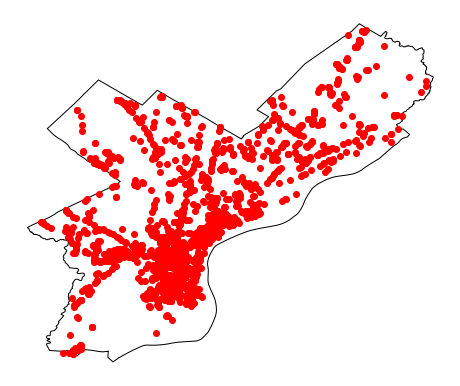

In [66]:
fig, ax = plt.subplots(figsize=(8, 8))
ax = city_limits.plot(ax=ax, facecolor='none', edgecolor='black')
ax = Yelp_Final.plot(ax=ax, color='red')  
ax.set_axis_off()
ax.set_aspect("equal")

In [67]:
import contextily as ctx

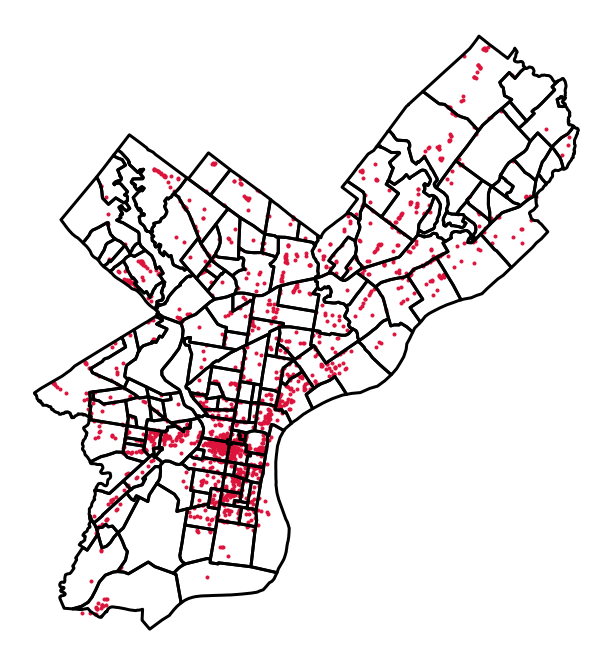

In [68]:
# create the axes
fig, ax = plt.subplots(figsize=(12, 12))

# Plot
Yelp_Final.plot(ax=ax, marker='.', color='crimson')

# Add the city limits
zillow.plot(ax=ax, edgecolor='black', linewidth=3, facecolor='none')

# remove axis lines
ax.set_axis_off()

In [69]:
Yelp_Final['Coordinates'].x

0      -75.201362
1      -75.189830
2      -75.166630
3      -75.171540
4      -75.174740
          ...    
1872   -75.162735
1873   -75.154140
1874   -75.130511
1875   -75.205770
1876   -75.162094
Length: 1877, dtype: float64

In [72]:
import altair as alt

In [247]:
background = alt.Chart(zillow).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=800,
    height=600
)

points = alt.Chart(Yelp_Final).mark_circle(color='teal').encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    size=alt.value(10),
    tooltip= ['name','Address','rating', 'Avg_Food_Violations', 'Avg_Retail_Violations']
).properties(
    width=800,
    height=600
)
background + points

Philadelphia_Rest = background + points

Philadelphia_Rest.save('Philadelphia_Rest.json')

In [248]:
background + points

alt.LayerChart(...)

In [92]:
Yelp_Final.head(2)

name         Address         Dates  Foodborne_Violations  \
0  &PIZZA - UPENN  3925 WALNUT ST  Sep 29, 2020                     0   
1        1201 BAR  1201 S 28TH ST  Feb 17, 2019                     4   

   Poor_Retail_Violations  Inspection_Count  Avg_Food_Violations  \
0                       1                 4                  0.8   
1                       5                 7                  1.4   

   Avg_Retail_Violations  review_count  rating  Price_#  zip_code  \
0                    1.5            49     4.0      2.0   19104.0   
1                    2.4             5     3.5      1.0   19146.0   

           city Category_1  Category_2 Formatted_Date  Year  \
0  Philadelphia      Pizza  Vegetarian     2020-09-29  2020   
1  Philadelphia       Bars        Bars     2019-02-17  2019   

                  Coordinates   latitude  longitude  
0  POINT (-75.20136 39.95431)  39.954309 -75.201362  
1  POINT (-75.18983 39.93897)  39.938970 -75.189830

In [231]:
Distribution_of_Yelp_Ratings = alt.Chart(Yelp_Final, title='Distribution of Yelp Ratings').mark_bar(color='teal').encode(
    alt.X("rating:Q", bin=True),
    y='count()',
).properties(
    width=500,
    height=600
)

Distribution_of_Yelp_Ratings.save('Distribution_of_Yelp_Ratings.json')

In [258]:
alt.Chart(Yelp_Final, title='Ratings by Average Number of Food Safety Violations Per Inspection').mark_circle(color='teal', size=60).encode(
    x='rating:Q',
    y='Avg_Food_Violations:Q',
    tooltip=['name']
).properties(
    width=500,
    height=600).interactive()

alt.Chart(...)

In [272]:
Ratings_by_Food_Vio = alt.Chart(Yelp_Final, 
          title='Ratings by Average Number of Food Safety Violations Per Inspection').mark_boxplot(
color='teal').encode(
    x='rating:Q',
    y='Avg_Food_Violations:Q',
    tooltip=['name']
).properties(
    width=500,
    height=600
).interactive()

Ratings_by_Food_Vio.save('Ratings_by_Food_Vio.json')

In [275]:
Ratings_by_Retail_Vio = alt.Chart(Yelp_Final, 
          title='Ratings by Average Number of Retail Practice Violations Per Inspection').mark_boxplot(
color='teal').encode(
    x='rating:Q',
    y='Avg_Retail_Violations:Q',
    tooltip=['name']
).properties(
    width=500,
    height=600
).interactive()


Ratings_by_Retail_Vio.save('Ratings_by_Retail_Vio.json')

In [280]:
NumberofReviews = alt.Chart(
    Yelp_Final, 
    title='Distribution of Number of Reviews for Each Establishment').mark_bar(color='teal').encode(
    alt.X("rating:O"),
    y='review_count:Q',
).properties(
    width=500,
    height=600
)

NumberofReviews.save('NumberofReviews.json')

In [228]:
# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Model selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Pipelines
from sklearn.pipeline import make_pipeline

# Preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [244]:
# The feature columns we want to use
cols = ['name',
 'Address',
 'Inspection_Count',
 'Avg_Food_Violations',
 'Avg_Retail_Violations',
 'review_count',
 'rating',
 'Price_#',
 'zip_code',
 'Category_1',
 'Category_2',
 'Coordinates']

# Trim to these columns and remove NaNs
Yelp_Final_Model = Yelp_Final[cols].dropna()

Yelp_Final_Model['zip_code'] = Yelp_Final_Model['zip_code'].astype(str)

In [245]:
len(Yelp_Final_Model)

1596

In [246]:
# Split the data 70/30
train_set, test_set = train_test_split(Yelp_Final_Model, 
                                       test_size=0.3, 
                                       random_state=42)

# the target labels: log of sale price
y_train = np.log(train_set["rating"])
y_test = np.log(test_set["rating"])

# The features
feature_cols = [
    'name',
 'Address',
 'Inspection_Count',
 'Avg_Food_Violations',
 'Avg_Retail_Violations',
 'review_count',
 'rating',
 'Price_#',
 'zip_code',
 'Category_1',
 'Category_2'
]
X_train = train_set[feature_cols].values
X_test = test_set[feature_cols].values

In [247]:
# Numerical columns
num_cols = [
    'Inspection_Count',
     'Avg_Food_Violations',
     'Avg_Retail_Violations',
     'review_count'
]

# Categorical columns
cat_cols = ['Price_#',
 'zip_code',
 'Category_1',
 'Category_2']

In [248]:
# Set up the column transformer with two transformers
# ----> Scale the numerical columns
# ----> One-hot encode the categorical columns

transformer = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

In [249]:
# Initialize the pipeline
# NOTE: only use 10 estimators here so it will run in a reasonable time
pipe = make_pipeline(
    transformer, RandomForestRegressor(n_estimators=10, 
                                       random_state=42)
)

In [250]:
# Fit the training set
pipe.fit(train_set, y_train);

In [251]:
# What's the test score?
pipe.score(test_set, y_test)

0.08489001686781283

In [252]:
# The one-hot step
ohe = transformer.named_transformers_['cat']

ohe

OneHotEncoder(handle_unknown='ignore')

In [255]:
# One column for each category type!
ohe_cols = ohe.get_feature_names()

In [256]:
# Full list of columns is numerical + one-hot 
features = num_cols + list(ohe_cols)

In [257]:
random_forest = pipe["randomforestregressor"]

# Create the dataframe with importances
importance = pd.DataFrame(
    {"Feature": features, "Importance": random_forest.feature_importances_}
)

In [258]:
importance.head(n=20)

Feature  Importance
0        Inspection_Count    0.168724
1     Avg_Food_Violations    0.088774
2   Avg_Retail_Violations    0.074625
3            review_count    0.146869
4                  x0_1.0    0.006760
5                  x0_2.0    0.009224
6                  x0_3.0    0.007733
7                  x0_4.0    0.000457
8              x1_19102.0    0.006078
9              x1_19103.0    0.002416
10             x1_19104.0    0.002855
11             x1_19106.0    0.001844
12             x1_19107.0    0.006116
13             x1_19111.0    0.010001
14             x1_19112.0    0.000550
15             x1_19114.0    0.000543
16             x1_19115.0    0.004125
17             x1_19116.0    0.001225
18             x1_19118.0    0.001380
19             x1_19119.0    0.002452

In [259]:
import seaborn as sns

<AxesSubplot:>

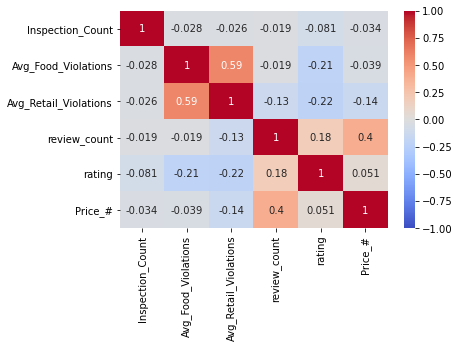

In [260]:
sns.heatmap(
    train_set[feature_cols].corr(), 
    cmap="coolwarm", 
    annot=True, 
    vmin=-1, 
    vmax=1
)